In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("us_police.csv")
#note: the name of the data set was renamed to us_police purposely

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True
7681,7682,NaN,2022-08-23,shot,undetermined,NaN,M,B,Splendora,TX,False,undetermined,Car,False,-95.166,30.229,True


In [5]:
print(f"The data contains  {df.shape} rows and columns respectively")

The data contains  (7682, 17) rows and columns respectively


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7682 non-null   int64  
 1   name                     7275 non-null   object 
 2   date                     7682 non-null   object 
 3   manner_of_death          7682 non-null   object 
 4   armed                    7473 non-null   object 
 5   age                      7210 non-null   float64
 6   gender                   7663 non-null   object 
 7   race                     6244 non-null   object 
 8   city                     7682 non-null   object 
 9   state                    7682 non-null   object 
 10  signs_of_mental_illness  7682 non-null   bool   
 11  threat_level             7682 non-null   object 
 12  flee                     6819 non-null   object 
 13  body_camera              7682 non-null   bool   
 14  longitude               

observation:
The data contains only one integer which is the id, it also contains 3 floats and 3 bools while the rest are objects

In [7]:
#checking the numbers of unique values in each columns
df.nunique()

id                         7682
name                       7241
date                       2604
manner_of_death               2
armed                       103
age                          81
gender                        2
race                          6
city                       3142
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5998
latitude                   5298
is_geocoding_exact            2
dtype: int64

In [8]:
#to see all the columns present in the datset
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7682.0,3841.500000,2217.746717,1.000,1921.2500,3841.500,5761.7500,7682.000
age,7210.0,37.161997,12.951797,2.000,27.0000,35.000,45.0000,92.000
longitude,6847.0,-97.057301,16.593304,-160.007,-112.0405,-94.249,-83.0805,-67.867
latitude,6847.0,36.668453,5.394855,19.498,33.4785,36.095,40.0265,71.301


# observation:
    The minimum age of the deceased is 2 while the maximum age is 92. The average age also is 35
    The minimum distance which is the longitude is -160 while the maximum is -67
    The mimimum distance which is the latitude is 5.39 while the maximum is 71.301

# Missing values treatment 

In [10]:
df.isnull()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
7678,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7679,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
7680,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Observation:
Instead of filling the null values with '0', we can definetely use the median to fill the null values for the columns.

In [13]:
# filling the null values for the age
df['age'] = df['age'].fillna(
value = df.groupby(['name'])['age'].transform('median')
)

In [14]:
# rechecking the null values 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         470
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [15]:
df['age'] = df['age'].fillna(df['age'].median())
#rechecking the null values 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [16]:
# filling the null values for longitude
df['longitude'] = df['longitude'].fillna(
value = df.groupby(['name'])['longitude'].transform('median')
)

In [17]:
#rechecking the null values
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   828
latitude                    835
is_geocoding_exact            0
dtype: int64

In [18]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
#rechecking the null values 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                    835
is_geocoding_exact            0
dtype: int64

In [19]:
#filling the null values for latitude
df['latitude'] = df['latitude'].fillna(
value = df.groupby(['name'])['latitude'].transform('median')
)

In [20]:
#rechecking the values 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                    828
is_geocoding_exact            0
dtype: int64

In [21]:
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
#rechecking the null values 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                      0
is_geocoding_exact            0
dtype: int64

In [22]:
#filling the null values for gender 
df['gender'].fillna('No gender', inplace = True)

In [23]:
#rechecking for the null values in gender 
df.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                           0
gender                        0
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                      0
is_geocoding_exact            0
dtype: int64

In [24]:
# filling the null values in name
df['name'].fillna('No name', inplace = True)

In [25]:
#rechecking the null values 
df.isnull().sum()

id                            0
name                          0
date                          0
manner_of_death               0
armed                       209
age                           0
gender                        0
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                      0
is_geocoding_exact            0
dtype: int64

In [26]:
#filling the null values for armed 
df['armed'].fillna('No armed', inplace = True)
#rechcking for the null values present in armed 
df.isnull().sum()

id                            0
name                          0
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                     0
latitude                      0
is_geocoding_exact            0
dtype: int64

In [27]:
#filling the null values present in race to No race 
df['race'].fillna('No race', inplace = True)
#rechecking for the null values present in race 
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        0
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       863
body_camera                  0
longitude                    0
latitude                     0
is_geocoding_exact           0
dtype: int64

In [28]:
#filling the null values present in flee to No flee
df['flee'].fillna('No flee', inplace = True)
#rechecking for the presence of null values in flee
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

In [29]:
#checking for overall null values 
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

# Outliers Detection
Outliers are data points that are far from other data points, they are unusual values in a dataset.
The rule of outliers says any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier
Causes of ouliers could be due to 
-data entry or measurement errors
-sampling problems and unusual conditions
-natural variations

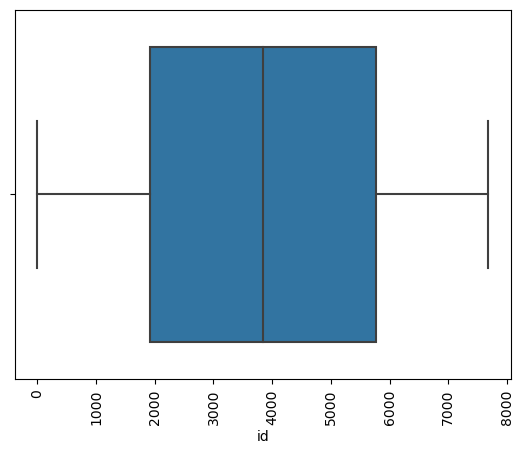

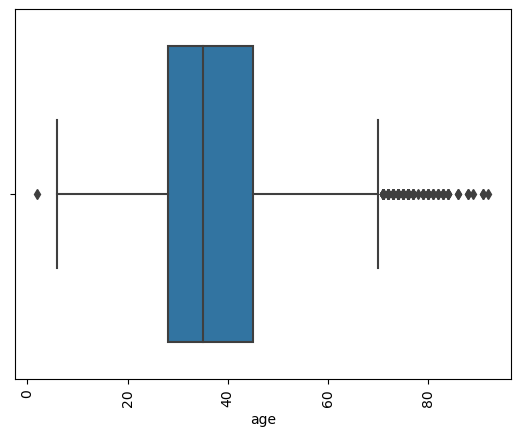

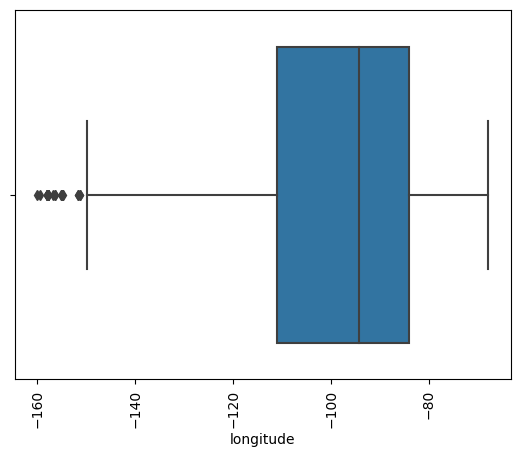

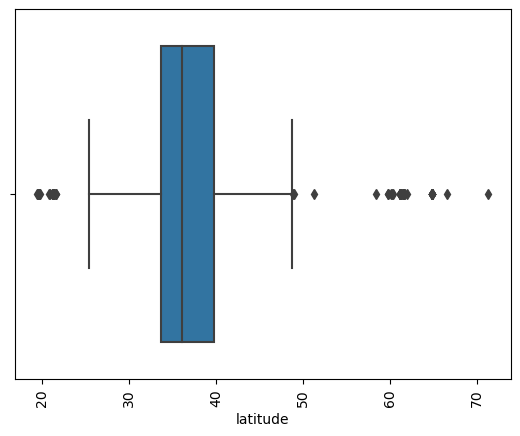

In [30]:
nums_cols = df.select_dtypes(include = np.number).columns.tolist()
for i, variable in enumerate (nums_cols):
    plt.xticks(rotation = 90)
    sns.boxplot(data = df, x = variable)
    plt.show()

# observation:
    longitude has little outliers below, while age has outliers at the top
    year does not have any outlier 

# checking the unique values of columns 

In [31]:
df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [32]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [33]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'No race', 'N'], dtype=object)

In [34]:
df['city'].unique()

array(['Shelton', 'Aloha', 'Wichita', ..., 'Miami Springs',
       'Monroe Township', 'Cut Off'], dtype=object)

In [35]:
df['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [36]:
df['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', 'No flee'], dtype=object)

In [37]:
df['age'].unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 56., 61., 45., 26., 40., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., 77., 58., 64., 52., 63., 44.,
       60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6., 12.,
       70., 80., 14., 82., 13., 73., 91., 79., 78., 84., 81., 89., 88.,
        8., 92.,  2.])

In [38]:
df['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

In [39]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'No race', 'N'], dtype=object)

In [40]:
#changing the date format by breaking all down into year, months and date
import datetime

In [41]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month_name()
df['Day'] = pd.DatetimeIndex(df['date']).day_name()
df.head(100)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,Day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,January,Friday
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,January,Friday
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,January,Saturday
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,January,Sunday
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Vincent Cordaro,2015-02-08,shot,gun,57.0,M,W,New City,NY,True,attack,Not fleeing,False,-74.001,41.152,True,2015,February,Sunday
96,97,Joseph Paffen,2015-02-08,shot,gun,46.0,M,W,Orange County,FL,False,attack,Not fleeing,False,-81.329,28.482,True,2015,February,Sunday
97,98,Larry Hostetter,2015-02-08,shot,gun,41.0,M,W,Nocona,TX,False,attack,Not fleeing,False,-97.712,33.787,True,2015,February,Sunday
98,99,Kenneth Kreyssig,2015-02-09,shot,gun,61.0,M,W,Smyrna,ME,True,attack,Not fleeing,False,-68.104,46.159,True,2015,February,Monday


In [42]:
#converting the true and false to numerical data  
df = df.replace(True, 1)
df = df.replace(False, 0)

In [43]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,Day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,1,attack,Not fleeing,0,-123.122,47.247,1,2015,January,Friday
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,0,attack,Not fleeing,0,-122.892,45.487,1,2015,January,Friday
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,0,other,Not fleeing,0,-97.281,37.695,1,2015,January,Saturday
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,1,attack,Not fleeing,0,-122.422,37.763,1,2015,January,Sunday
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,0,attack,Not fleeing,0,-104.692,40.384,1,2015,January,Sunday


# Exploring the variables and providing observations 

In [44]:
df['year'].value_counts().nlargest(40)

2021    1055
2020    1020
2019     999
2015     994
2018     993
2017     981
2016     958
2022     682
Name: year, dtype: int64

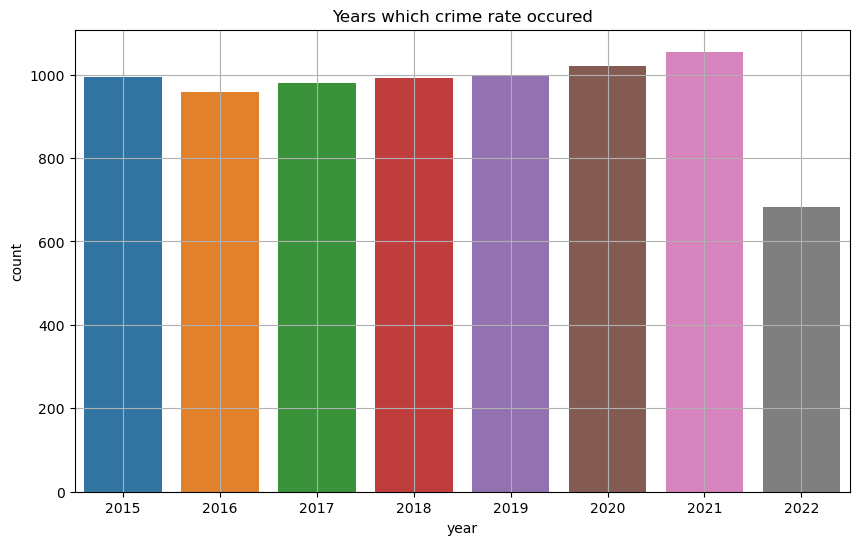

In [45]:
#plot the top value_counts
plt.figure(figsize=(10, 6))
sns.countplot(x= 'year', data=df)
plt.title("Years which crime rate occured")
plt.xticks(rotation = 0)
plt.grid()

In [46]:
df['month'].value_counts()

March        737
June         686
January      680
February     678
July         674
May          662
August       653
April        649
October      607
December     595
November     554
September    507
Name: month, dtype: int64

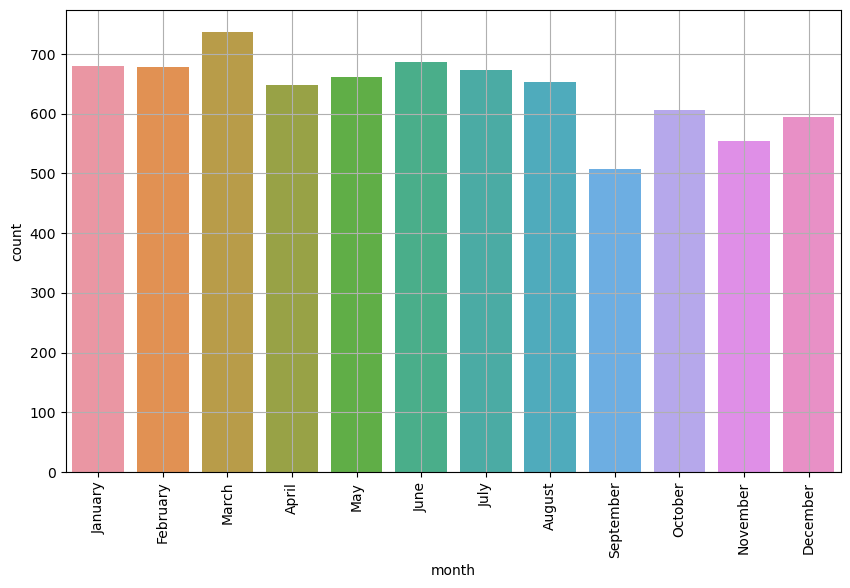

In [47]:
#plot the top value_counts
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', data=df)
#df['month'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation =  90)
plt.grid()
plt.show(30)

In [48]:
df['Day'].value_counts().nlargest()

Wednesday    1170
Tuesday      1158
Thursday     1142
Friday       1090
Sunday       1052
Name: Day, dtype: int64

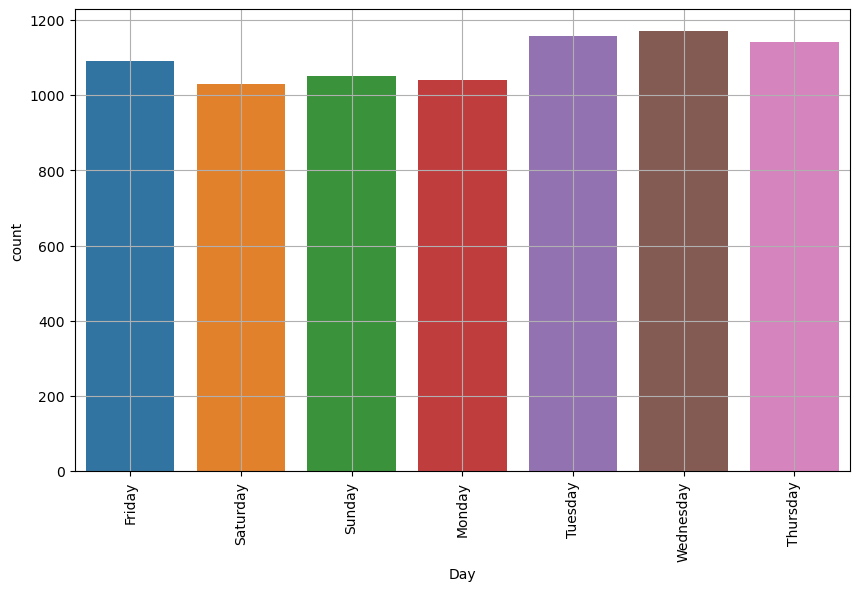

In [49]:
#plot the top value_counts
plt.figure(figsize=(10,6))
sns.countplot(x = 'Day', data=df)
plt.xticks(rotation =  90)
plt.grid()
plt.show(30)

In [50]:
df['name'].value_counts().nlargest()

No name             407
Michael Johnson       4
Andrew Dzwonchyk      2
Tyler Hodge           2
Robert Hammitt        2
Name: name, dtype: int64

# observation
The numbers of names that were not discovered in the dataset is 407

In [51]:
df['manner_of_death'].value_counts()

shot                7343
shot and Tasered     339
Name: manner_of_death, dtype: int64

(array([0, 1]), [Text(0, 0, 'shot'), Text(1, 0, 'shot and Tasered')])

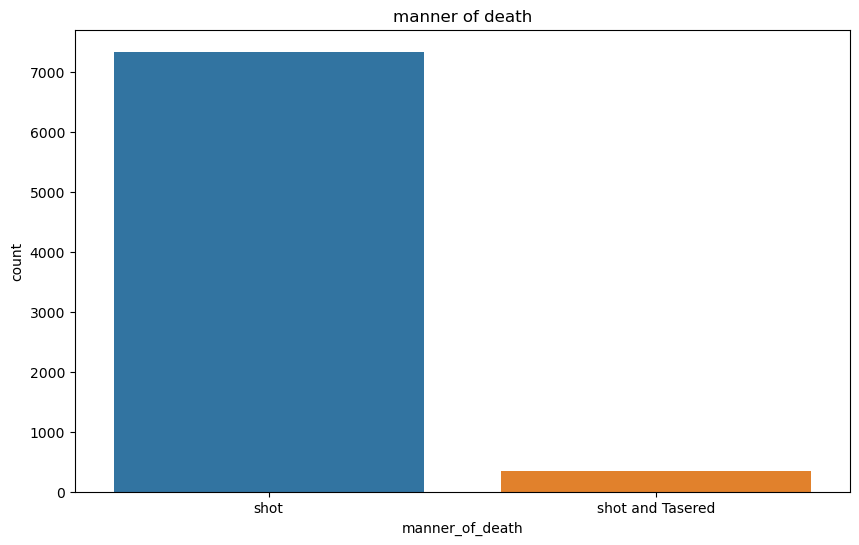

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'manner_of_death', data=df)
plt.title("manner of death")
plt.xticks(rotation = 0)

In [53]:
df['gender'].value_counts()

M            7317
F             346
No gender      19
Name: gender, dtype: int64

# observation
The numbers of gender that were not determined in the data set is 19

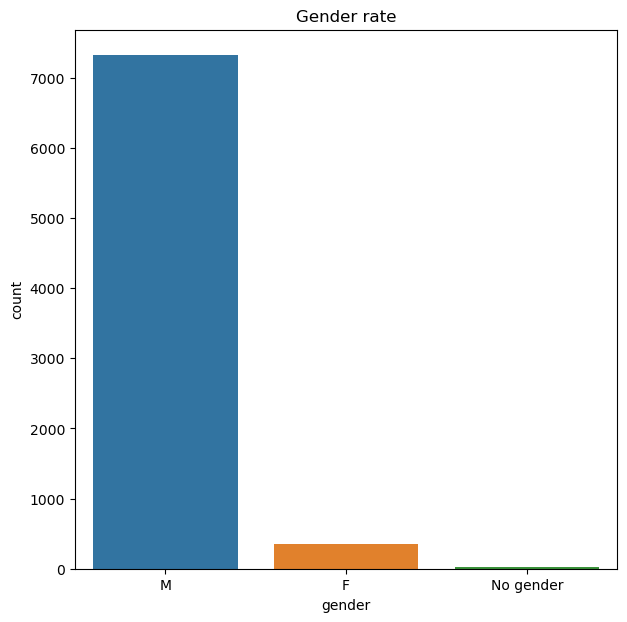

In [54]:
#plot the top value_counts
plt.figure(figsize=(7,7))
sns.countplot(x = 'gender', data=df)
plt.xticks()
plt.title("Gender rate")
plt.show()

In [55]:
df['race'].value_counts()

W          3183
B          1678
No race    1438
H          1127
A           112
N            97
O            47
Name: race, dtype: int64

# Observation
The numbers of race that were not determined in the data set is 1438

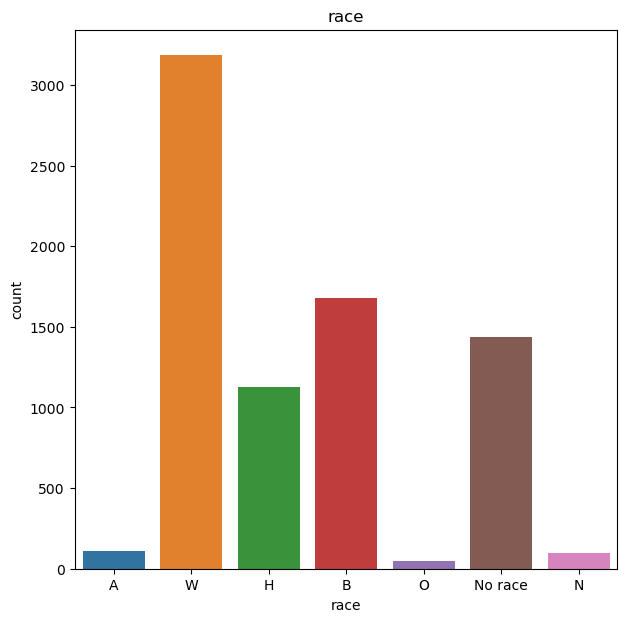

In [56]:
#plot the top value_counts for race
plt.figure(figsize=(7,7))
sns.countplot(x = 'race', data=df)
plt.xticks()
plt.title("race")
plt.show()

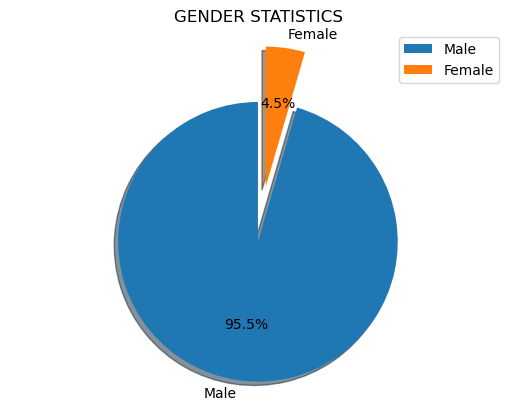

In [57]:
# pie chart showing the statistics of the gender
data = [7317, 346]
label = ['Male', 'Female']

plt.pie(data, labels=label, autopct = '%1.1f%%', explode=[0.1, 0.3], shadow=True, startangle=90)
plt.title("GENDER STATISTICS")
plt.axis('equal')
plt.legend()
plt.show()


#This shows that the crime was commited by males than the feamles

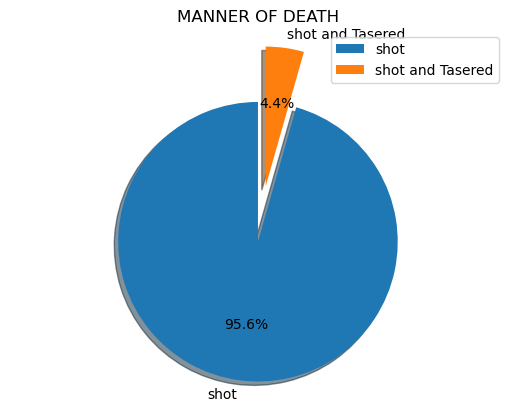

In [58]:
data = [7343, 339]
label = ['shot', 'shot and Tasered']

plt.pie(data, labels=label, autopct = '%1.1f%%', explode=[0.1, 0.3], shadow=True, startangle=90)
plt.title("MANNER OF DEATH")
plt.axis('equal')
plt.legend()
plt.show()

In [59]:
#Number of manner of death grouped by genders
df.groupby(['gender', 'manner_of_death']).agg(amount=('id', 'count'))

amount
gender    manner_of_death         
F         shot                 336
          shot and Tasered      10
M         shot                6988
          shot and Tasered     329
No gender shot                  19

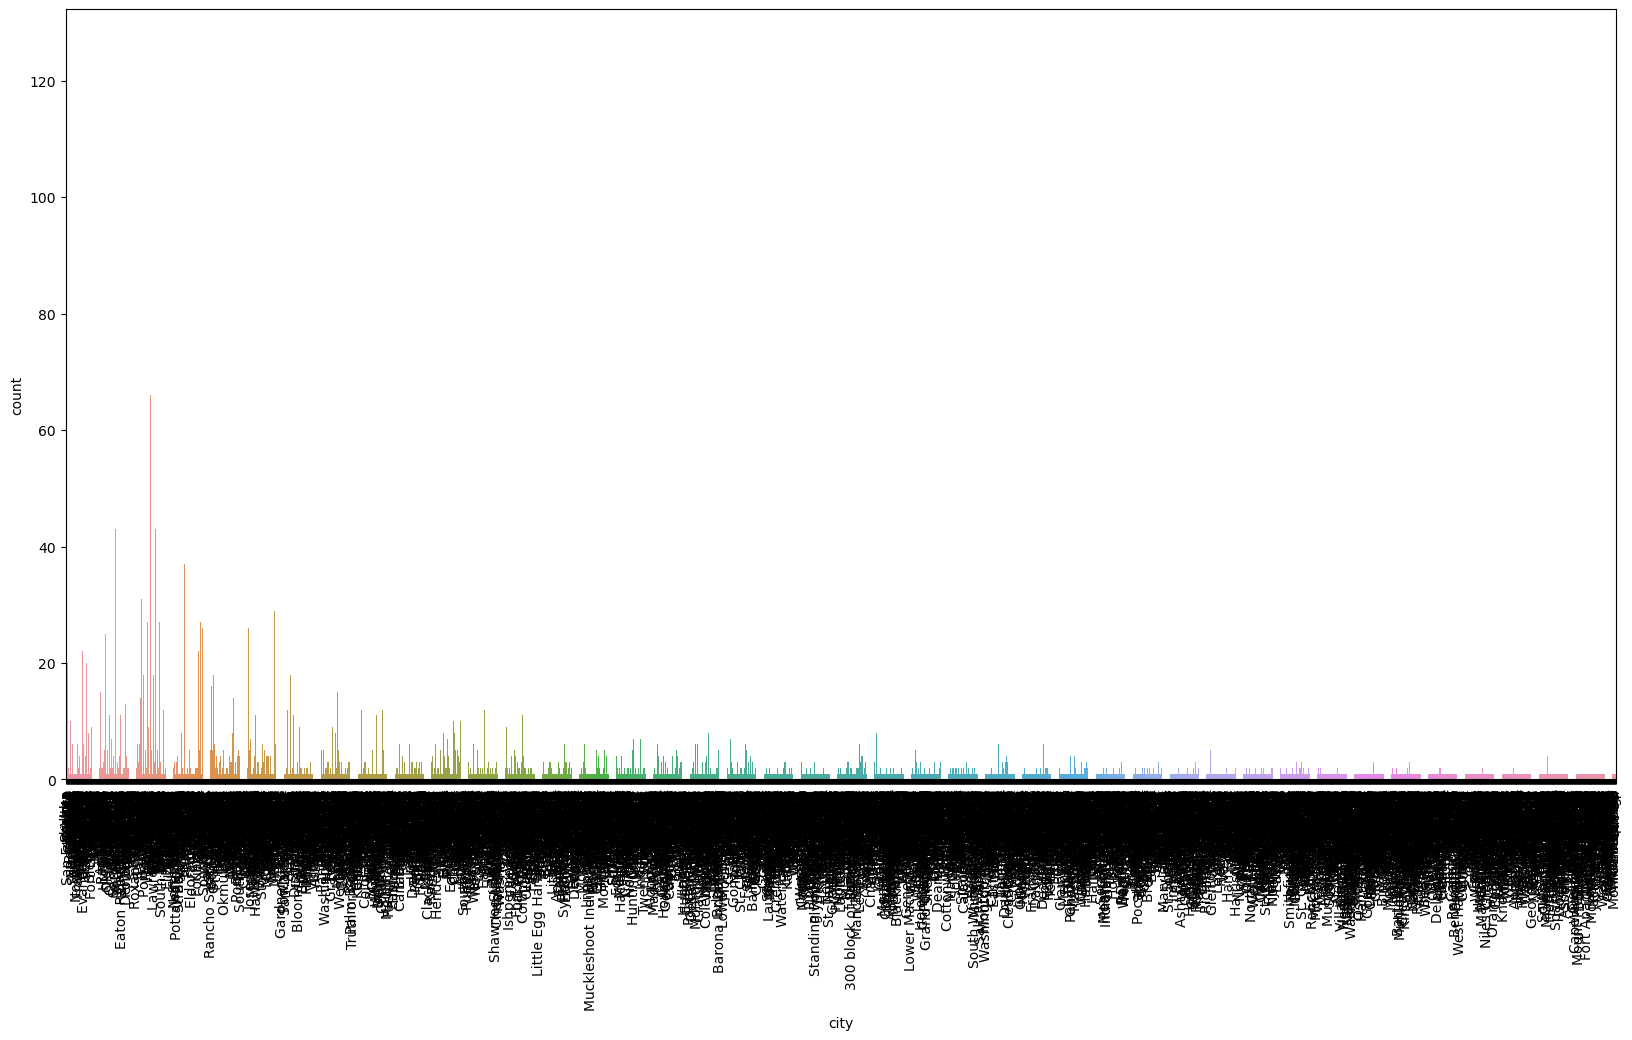

In [60]:
plt.figure(figsize=(20,10));
sns.countplot(data=df,x='city');
plt.xticks(rotation=90);

In [61]:
df['armed'].value_counts()

gun                    4379
knife                  1104
unarmed                 454
undetermined            309
vehicle                 275
                       ... 
claimed to be armed       1
bean-bag gun              1
binoculars                1
stapler                   1
flare gun                 1
Name: armed, Length: 104, dtype: int64

In [62]:
df['armed'].value_counts().nlargest(10)

gun               4379
knife             1104
unarmed            454
undetermined       309
vehicle            275
toy weapon         245
No armed           209
unknown weapon     115
machete             60
Taser               38
Name: armed, dtype: int64

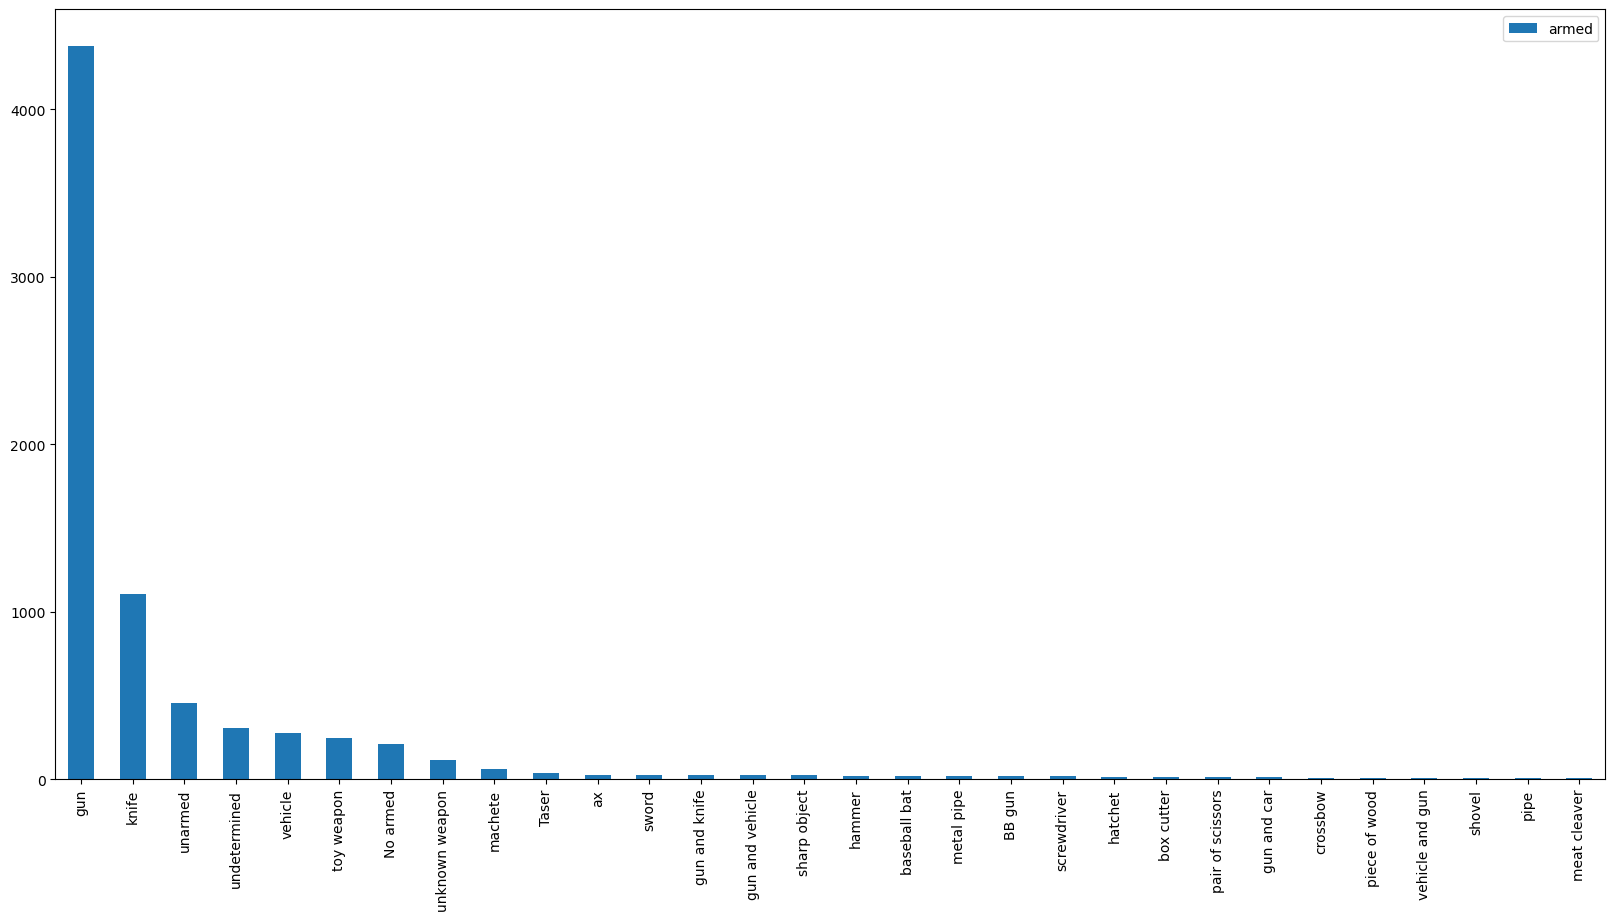

In [63]:
#plot the top value_counts
plt.figure(figsize=(20,10))
df['armed'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks()
plt.legend()
plt.show(30)

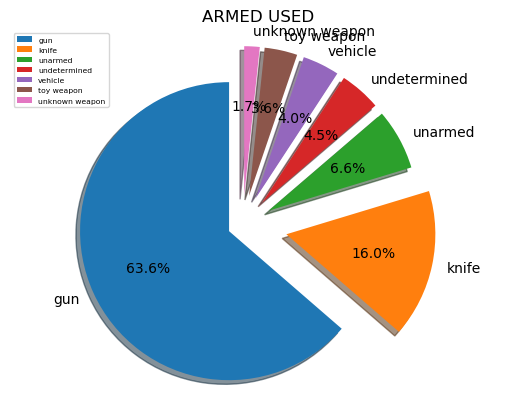

In [134]:
data = [4379, 1104, 454, 309, 275, 245, 115]
label = ['gun', 'knife', 'unarmed', 'undetermined', 'vehicle', 'toy weapon', 'unknown weapon']

plt.pie(data, labels=label, autopct = '%1.1f%%', explode=[0.1, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2], shadow=True, startangle=90)
plt.title("ARMED USED")
plt.axis('equal')
plt.legend(loc="upper left", fontsize=5.5)
plt.xticks(rotation = 2)
plt.show()

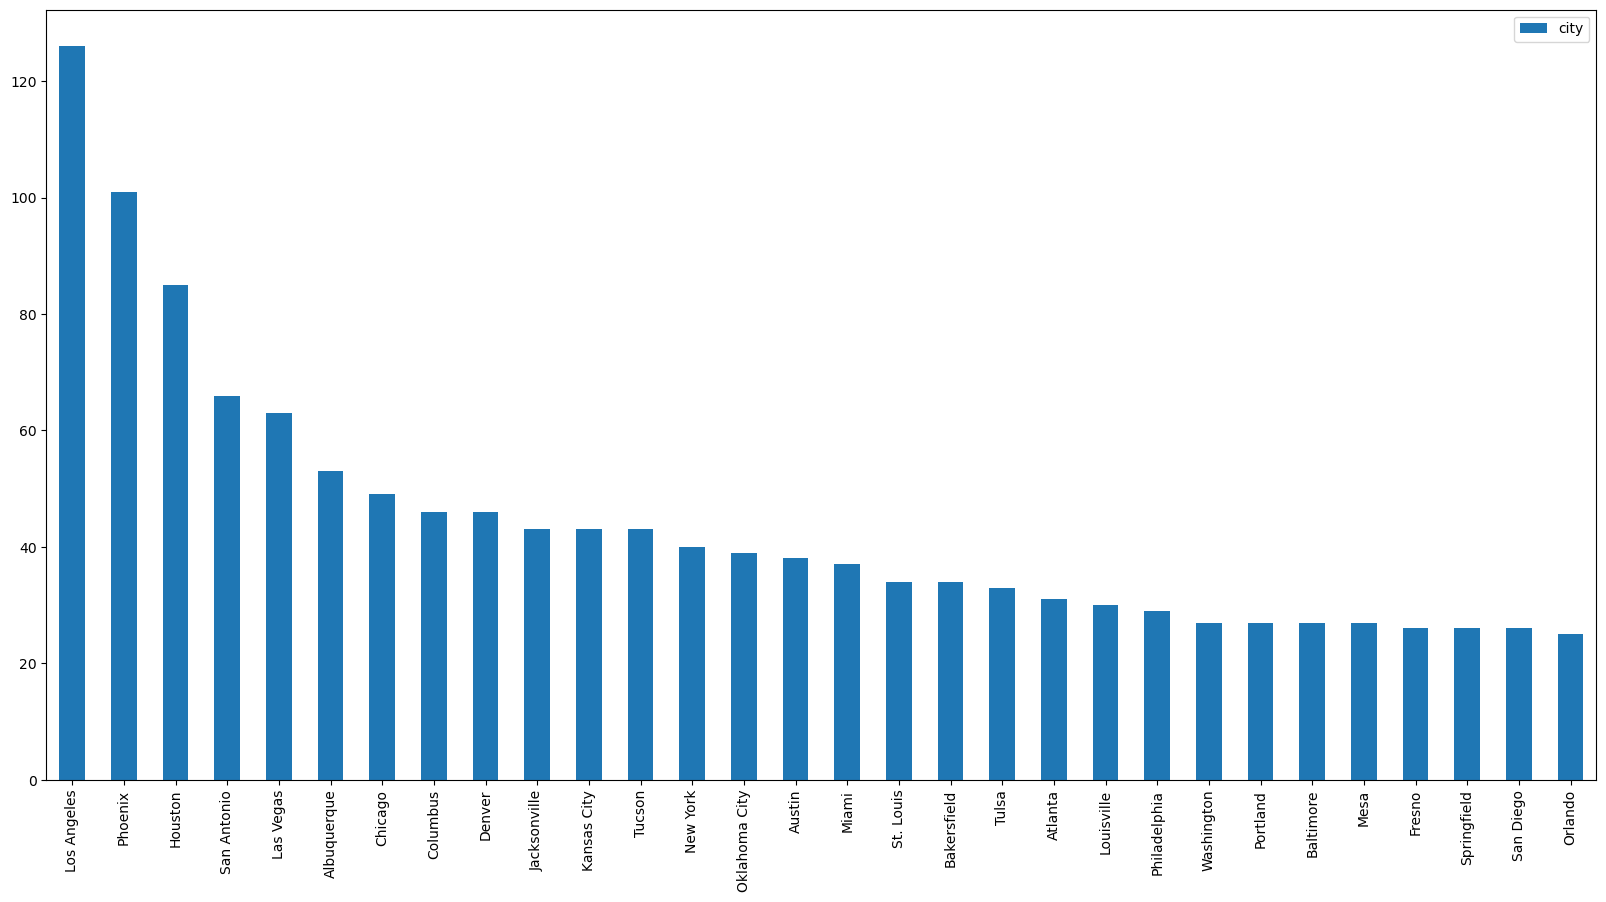

In [65]:
#plot the top value_counts for cities
plt.figure(figsize=(20,10))
df['city'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks()
plt.legend()
plt.show()

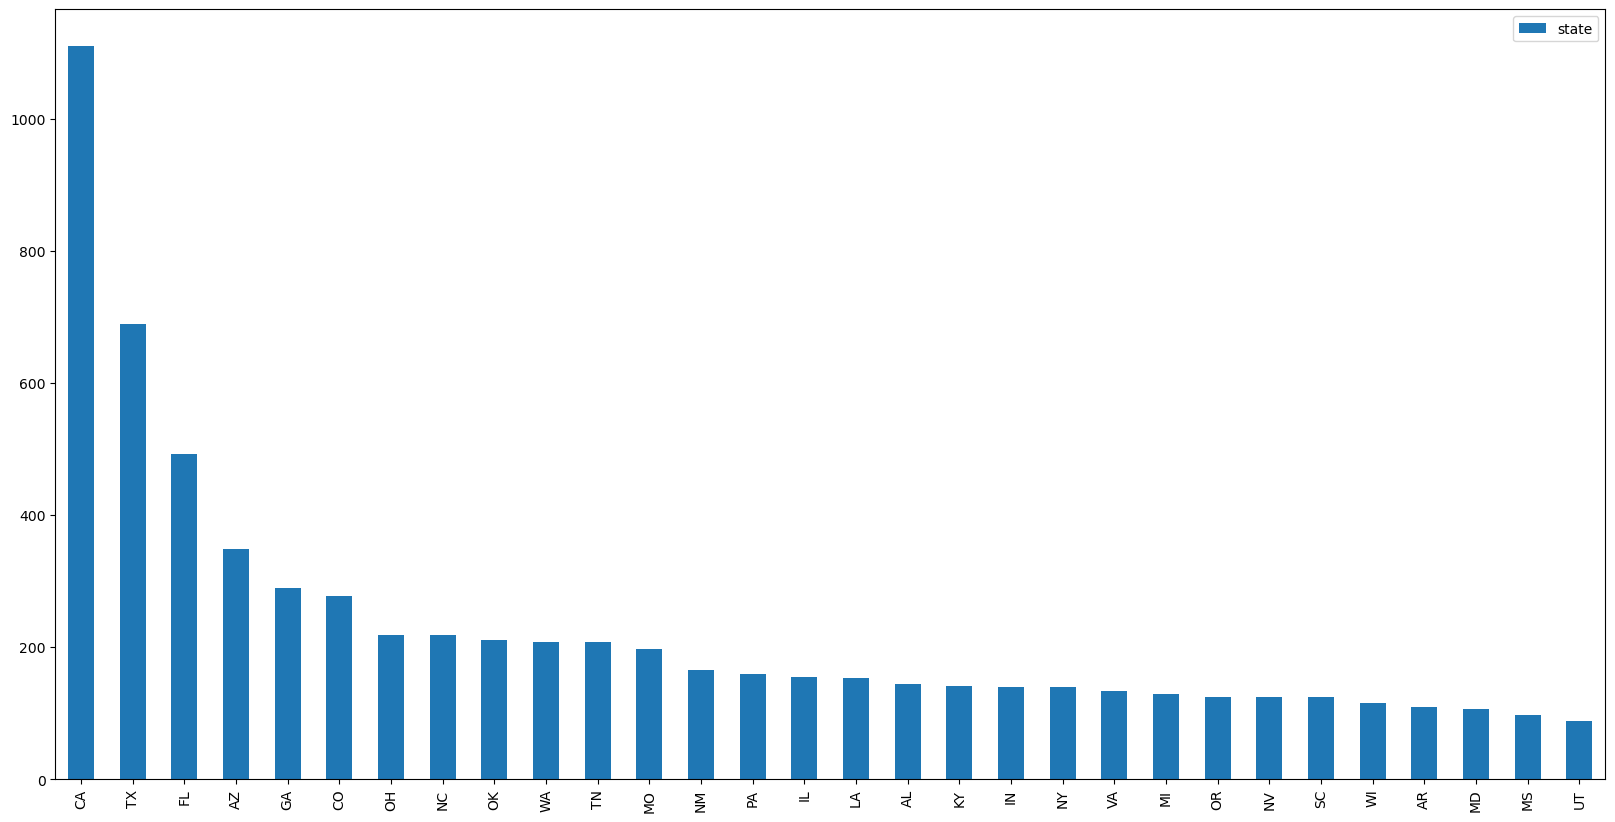

In [66]:
#plot the top value_counts for cities
plt.figure(figsize=(20,10))
df['state'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks()
plt.legend()
plt.show()

In [67]:
df['age'].value_counts()

35.0    705
31.0    253
27.0    249
32.0    249
34.0    246
       ... 
78.0      1
89.0      1
8.0       1
92.0      1
2.0       1
Name: age, Length: 81, dtype: int64

In [68]:
df['age'].value_counts().nlargest(30)

35.0    705
31.0    253
27.0    249
32.0    249
34.0    246
33.0    242
30.0    235
25.0    232
29.0    231
28.0    228
26.0    216
37.0    215
36.0    212
24.0    200
39.0    190
38.0    185
41.0    168
23.0    164
40.0    163
22.0    157
45.0    147
43.0    146
21.0    142
42.0    139
47.0    130
48.0    129
18.0    120
46.0    119
20.0    119
49.0    112
Name: age, dtype: int64

In [113]:
df['age'].value_counts().nsmallest(5)

78.0    1
89.0    1
8.0     1
92.0    1
2.0     1
Name: age, dtype: int64

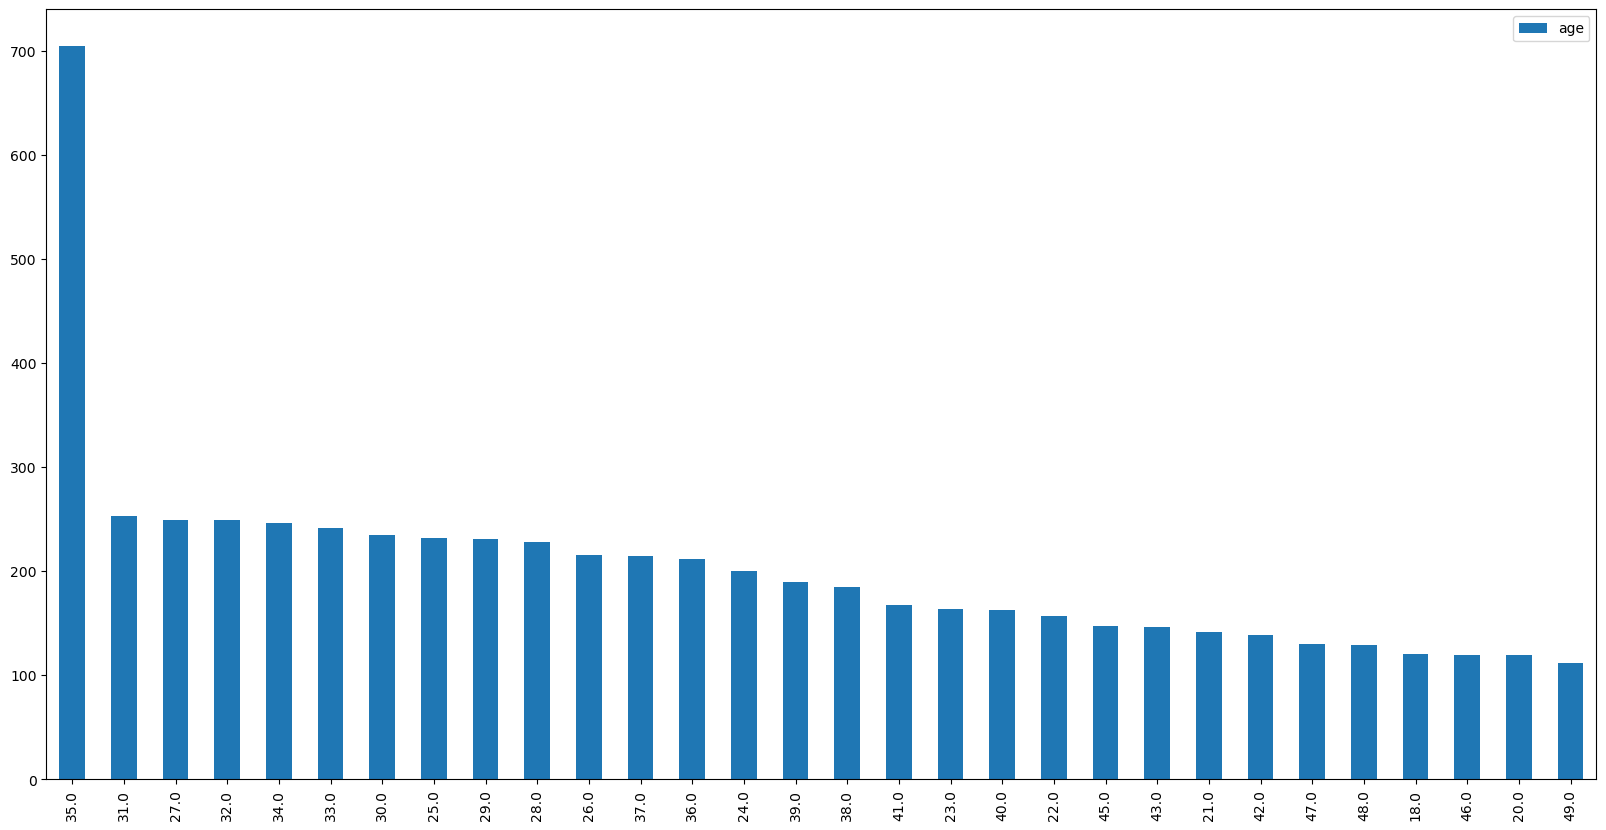

In [69]:
#plot the top value_counts
plt.figure(figsize=(20,10))
df['age'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks()
plt.legend()
plt.show(30)

In [70]:
df['signs_of_mental_illness'].value_counts().nlargest(30)

0    6058
1    1624
Name: signs_of_mental_illness, dtype: int64

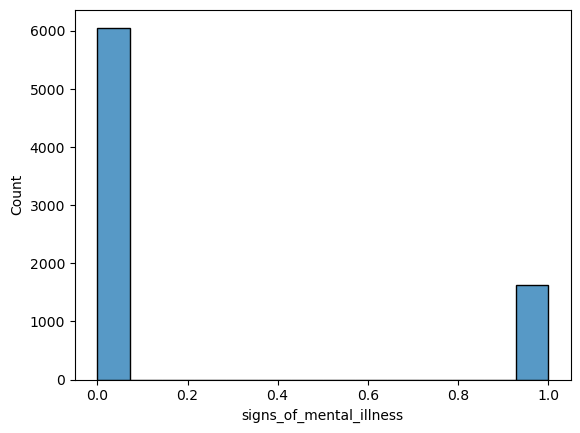

In [71]:
sns.histplot(data=df,x='signs_of_mental_illness');

In [72]:
df['threat_level'].value_counts().nlargest(30)

attack          4854
other           2530
undetermined     298
Name: threat_level, dtype: int64

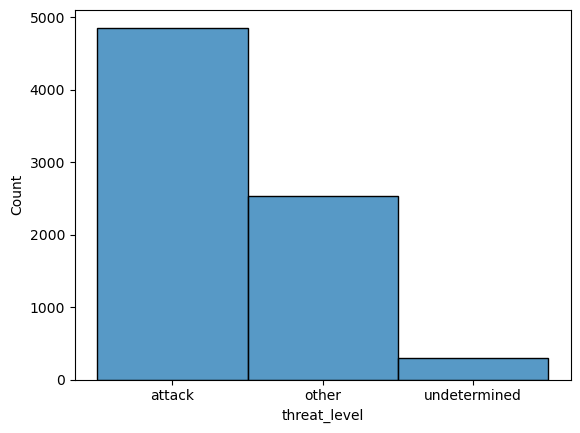

In [73]:
sns.histplot(data=df,x='threat_level');

In [74]:
df['flee'].value_counts().nlargest(30)

Not fleeing    4310
Car            1244
Foot            979
No flee         863
Other           286
Name: flee, dtype: int64

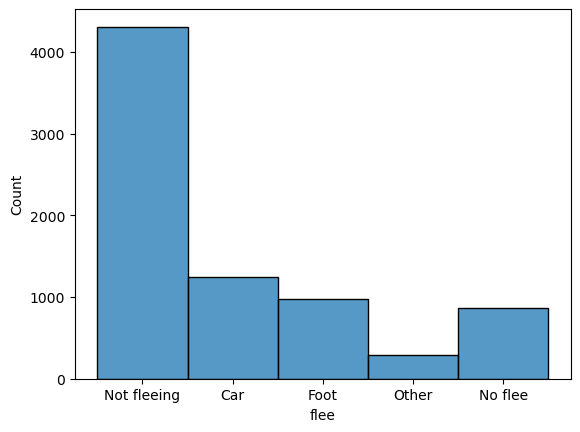

In [80]:
sns.histplot(data=df, x = 'flee');

In [81]:
df['body_camera'].value_counts().nlargest(30)

0    6589
1    1093
Name: body_camera, dtype: int64

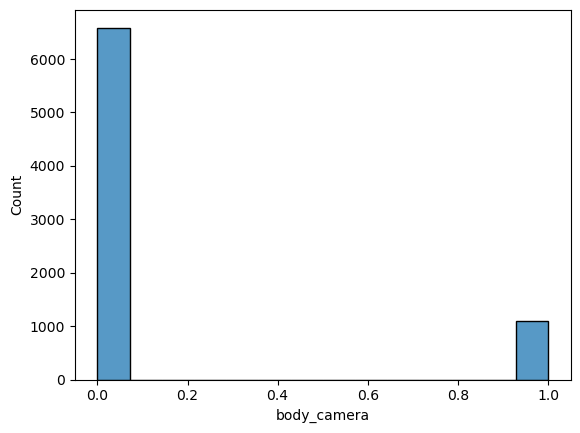

In [82]:
sns.histplot(data = df, x = 'body_camera');

# observation from the univariate analysis
Age: The least age amongst people is 2 while the oldest age is 92 but the common age which was observed is 35 which we can say it is the average age.
City: The city with the highest population is Lol Angeles, and from this say Lols angeles has people with most race and also the state that has the most population is 'CA'
-Comparing those with signs of mental illness to those without, it was observed that over six thousand (6,000+) people had no signs of mental illness compared to people that had with the rate of 1,624
-The threat-level was an attack on people while there were some threat level that was not determined as well
-Rate at which people flee most was through car but those that did not make a move was much more than that those that flee

# multivariate analysis
exploring relationships between the important variables in the dataset

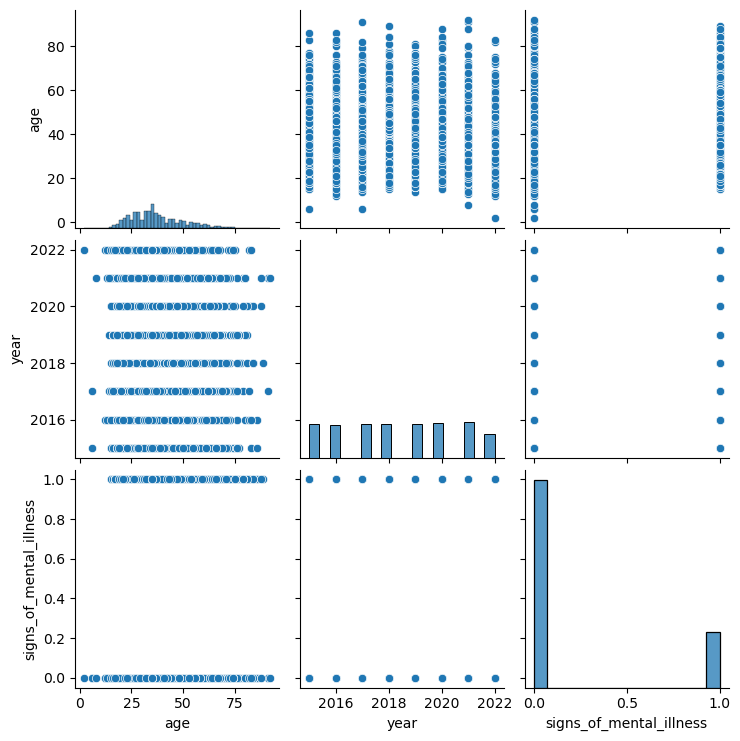

In [84]:
sns.pairplot(data=df[['age','year','signs_of_mental_illness','threat_level']]);

In [85]:
corelation = df.corr()

<AxesSubplot:>

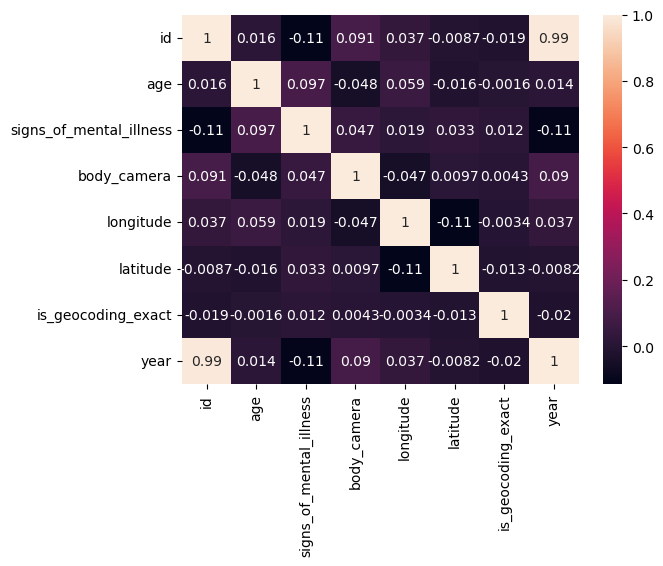

In [86]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
            ,annot=True)

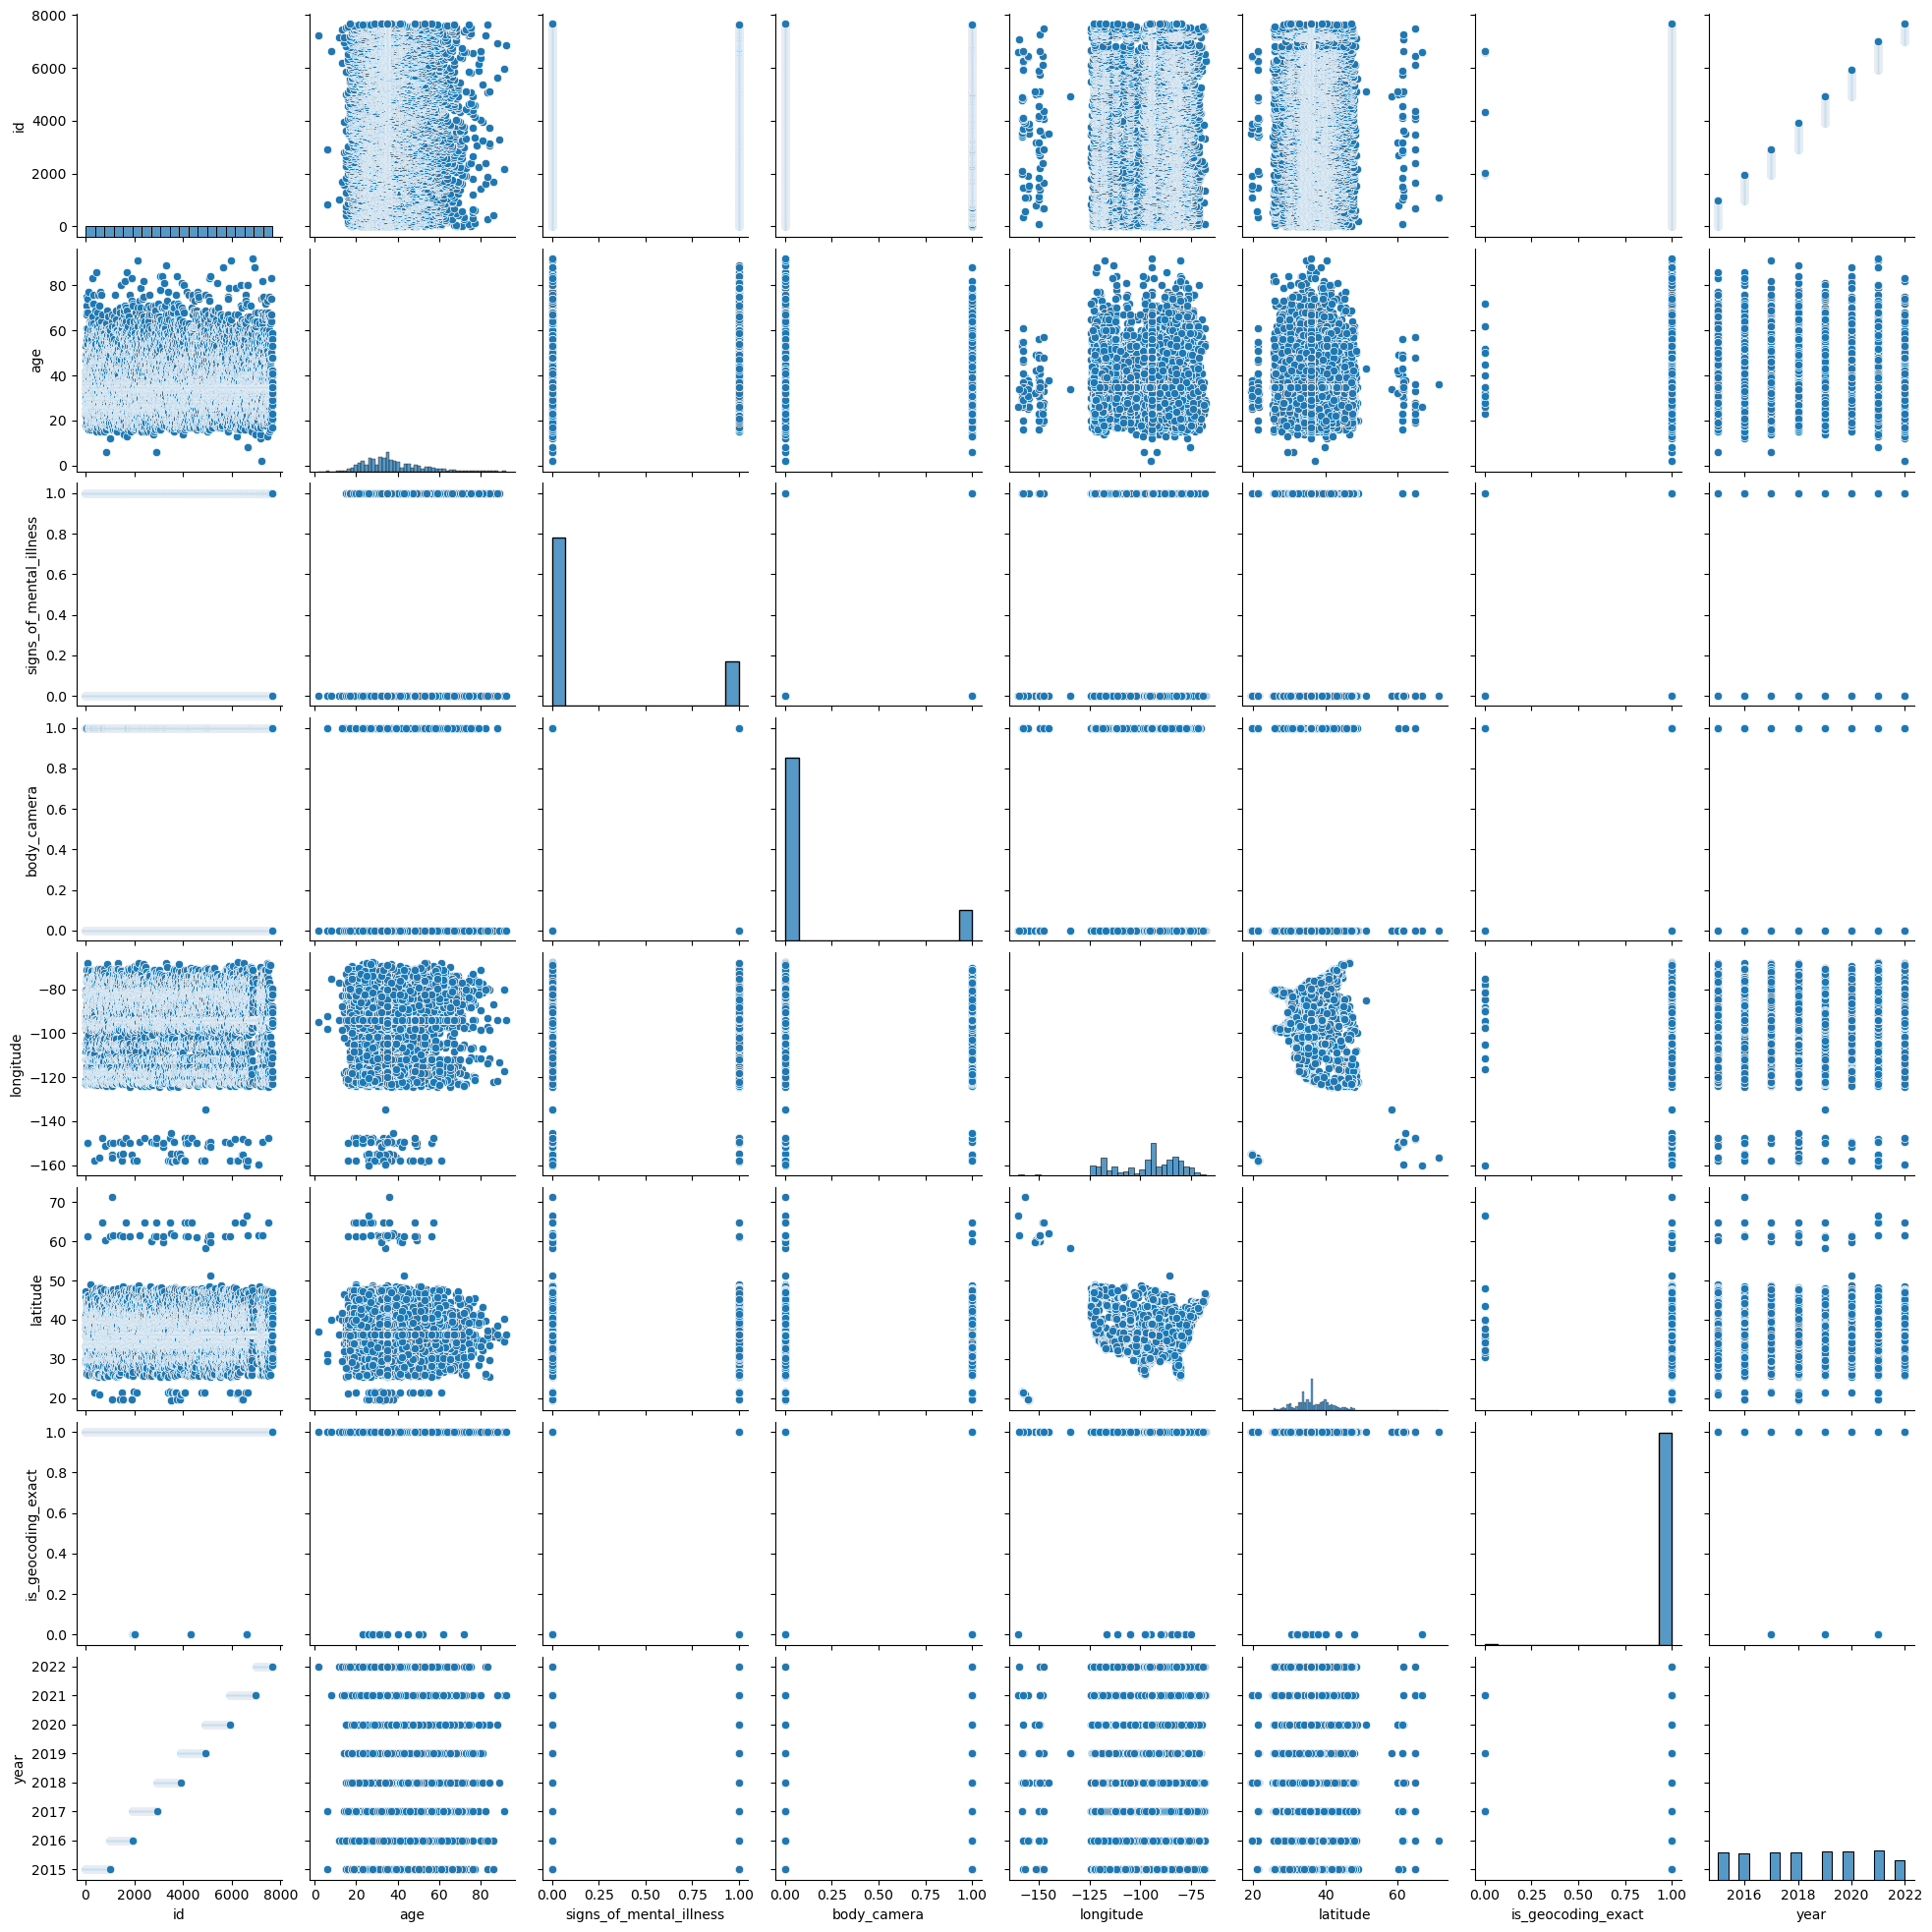

In [87]:
sns.pairplot(df)

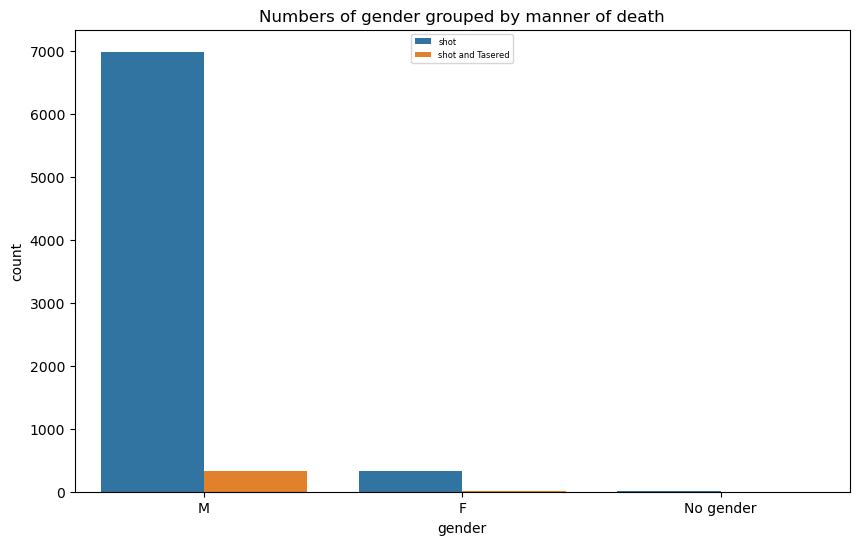

In [88]:
#comparing the rate of gender to manner of death

plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='manner_of_death', data=df)
plt.title('Numbers of gender grouped by manner of death')
plt.legend(fontsize=6)

# observation:
    The rate at which is Male were shot is much more than the rate at which the feamle were shot from the pictorial analysis above
    and at same time the rate of which the male were shot and tasered compared to the female was clearly shown that it was much more.
    This simply explains that the male suffered the calamity than the female gender.

In [89]:
#year grouped by signs of mental illness
df.groupby(['year', 'signs_of_mental_illness']).agg(amount=('id', 'count'))

amount
year signs_of_mental_illness        
2015 0                           734
     1                           260
2016 0                           710
     1                           248
2017 0                           743
     1                           238
2018 0                           772
     1                           221
2019 0                           783
     1                           216
2020 0                           801
     1                           219
2021 0                           907
     1                           148
2022 0                           608
     1                            74

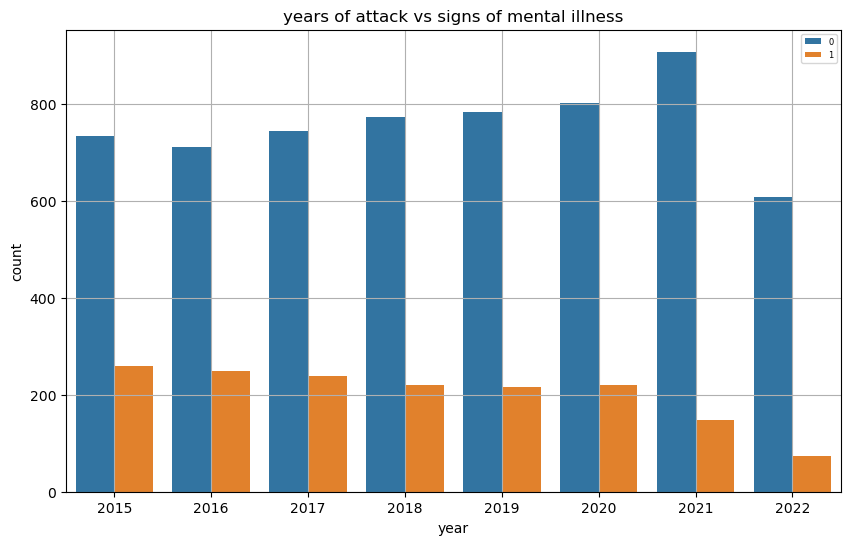

In [90]:
#comparing year and signs_of_mental_illness

plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='signs_of_mental_illness', data=df)
plt.title('years of attack vs signs of mental illness')
plt.legend(fontsize=6)
plt.grid()

# observation:
    The year in which signs of mental illness were discovered most was 2015 while the year when 
    the least signs of illness were also discovered was 2022.
    2018 and 2019 happened to be the average year 

In [91]:
#month grouped by signs of mental illness
df.groupby(['month', 'signs_of_mental_illness']).agg(amount=('id', 'count'))

amount
month     signs_of_mental_illness        
April     0                           510
          1                           139
August    0                           509
          1                           144
December  0                           473
          1                           122
February  0                           540
          1                           138
January   0                           527
          1                           153
July      0                           525
          1                           149
June      0                           554
          1                           132
March     0                           565
          1                           172
May       0                           527
          1                           135
November  0                           450
          1                           104
October   0                           488
          1                           119
September 0                           390
          1                           117

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

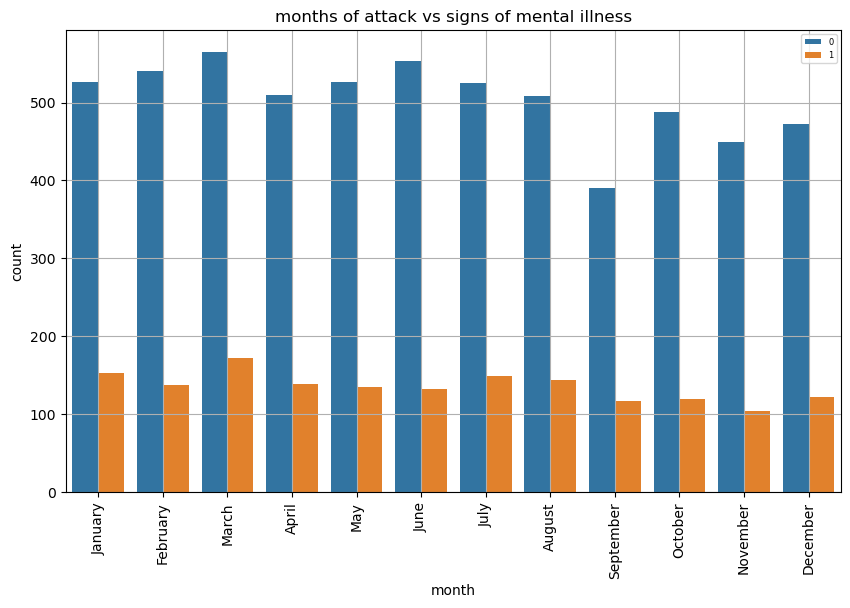

In [92]:
#comparing month and signs_of_mental_illness

plt.figure(figsize=(10,6))
sns.countplot(x='month', hue='signs_of_mental_illness', data=df)
plt.title('months of attack vs signs of mental illness')
plt.legend(fontsize=6)
plt.grid()
plt.xticks(rotation = 90)

# observation:
    The month that has the highest rate of signs of mental illness was the month of march
    while the month of november had the lowest rate of signs of mental illness

In [93]:
#years grouped by the threat level
df.groupby(['year', 'threat_level']).agg(amount=('id', 'count'))

amount
year threat_level        
2015 attack           732
     other            228
     undetermined      34
2016 attack           548
     other            384
     undetermined      26
2017 attack           593
     other            368
     undetermined      20
2018 attack           613
     other            365
     undetermined      15
2019 attack           689
     other            278
     undetermined      32
2020 attack           685
     other            301
     undetermined      34
2021 attack           641
     other            345
     undetermined      69
2022 attack           353
     other            261
     undetermined      68

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022')])

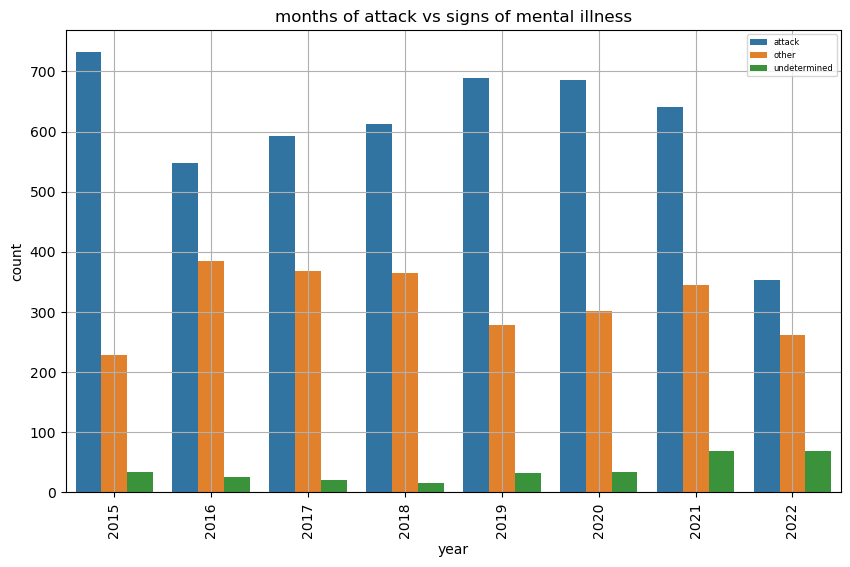

In [94]:
#comparing month and signs_of_mental_illness

plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='threat_level', data=df)
plt.title('months of attack vs signs of mental illness')
plt.legend(fontsize=6)
plt.grid()
plt.xticks(rotation = 90)

# observation:
    Year with the highest threat level was 2015 while 2022 had the lowest threat 
    level that is, attack was much more in 2015 compared to 2022 and other form of attack which was 
    not mentioned also arose in the year 2016

In [95]:
#state grouped by the threat level
df.groupby(['state', 'threat_level']).agg(amount=('id', 'count'))

amount
state threat_level        
AK    attack            37
      other             14
      undetermined       1
AL    attack           100
      other             35
...                    ...
WV    other             20
      undetermined       2
WY    attack            16
      other              6
      undetermined       3

[146 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'WA'),
  Text(1, 0, 'OR'),
  Text(2, 0, 'KS'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'CO'),
  Text(5, 0, 'OK'),
  Text(6, 0, 'AZ'),
  Text(7, 0, 'IA'),
  Text(8, 0, 'PA'),
  Text(9, 0, 'TX'),
  Text(10, 0, 'OH'),
  Text(11, 0, 'LA'),
  Text(12, 0, 'MT'),
  Text(13, 0, 'UT'),
  Text(14, 0, 'AR'),
  Text(15, 0, 'IL'),
  Text(16, 0, 'NV'),
  Text(17, 0, 'NM'),
  Text(18, 0, 'MN'),
  Text(19, 0, 'MO'),
  Text(20, 0, 'VA'),
  Text(21, 0, 'NJ'),
  Text(22, 0, 'IN'),
  Text(23, 0, 'KY'),
  Text(24, 0, 'MA'),
  Text(25, 0, 'NH'),
  Text(26, 0, 'FL'),
  Text(27, 0, 'ID'),
  Text(28, 0, 'MD'),
  Text(29, 0, 'NE'),
  Text(30, 0, 'MI'),
  Text(31, 0, 'GA'),
  Text(32, 0, 'TN'),
  Text(33, 0, 'NC'),
  Text(34, 0, 'AK'),
  Text(35, 0, 'NY'),
  Text(36, 0, 'ME'),
  T

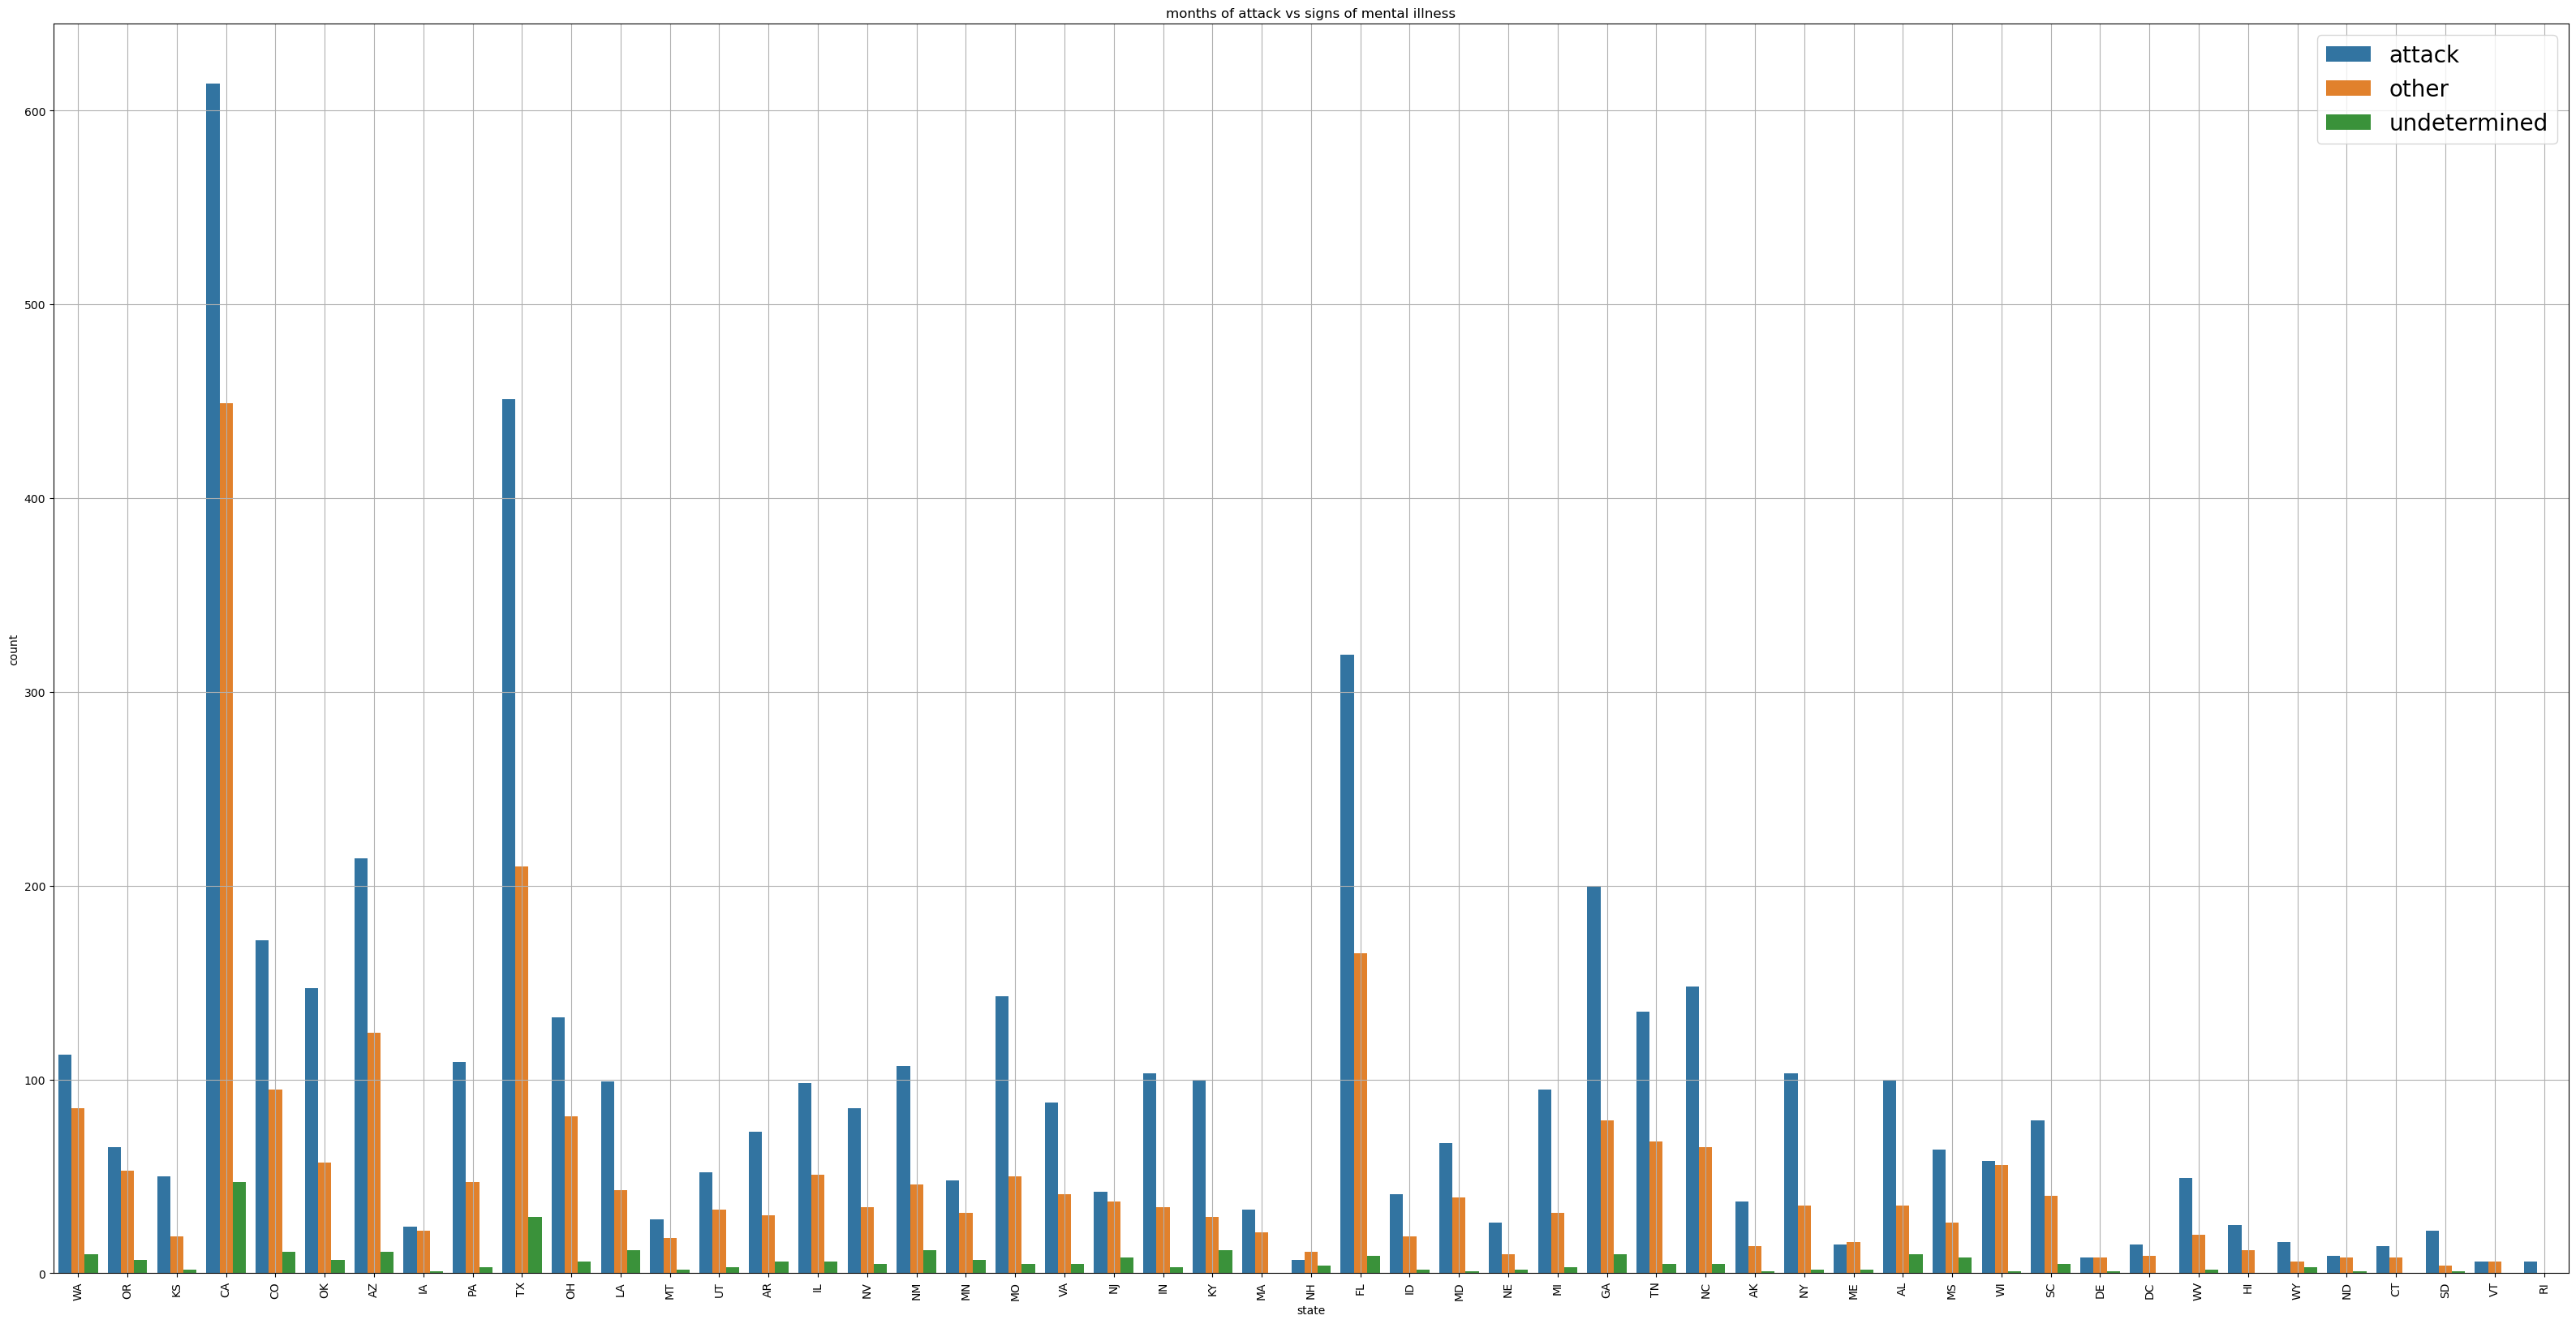

In [122]:
#comparing month and signs_of_mental_illness

plt.figure(figsize=(40,20))
sns.countplot(x='state', hue='threat_level', data=df)
plt.title('months of attack vs signs of mental illness')
plt.legend(fontsize=20, loc = 'upper right')
plt.grid()
plt.xticks(rotation = 90)

In [97]:
grouped = df.groupby('gender')
print(grouped['age'].agg(np.mean))
print("\n")

gender
F            37.297688
M            37.022960
No gender    33.421053
Name: age, dtype: float64




In [98]:
df.groupby(['age']).sum()

,id,signs_of_mental_illness,body_camera,longitude,latitude,is_geocoding_exact,year
age,,,,,,,
2.0,7242,0,0,-94.7360,37.024,1,2022
6.0,3734,0,1,-190.3070,60.677,2,4032
8.0,6646,0,0,-75.2690,39.908,1,2021
12.0,8182,0,0,-171.2855,76.497,2,4038
13.0,15341,0,2,-269.2950,111.158,3,6059
...,...,...,...,...,...,...,...
86.0,2105,1,0,-208.9520,72.925,2,4031
88.0,12557,1,2,-215.7855,74.679,2,4041
89.0,3301,1,0,-113.2310,35.528,1,2018


In [99]:
#race grouped by the threat level
df.groupby(['race', 'threat_level']).agg(amount=('id', 'count'))

amount
race    threat_level        
A       attack            59
        other             51
        undetermined       2
B       attack          1117
        other            499
        undetermined      62
H       attack           655
        other            439
        undetermined      33
N       attack            56
        other             36
        undetermined       5
No race attack           864
        other            477
        undetermined      97
O       attack            31
        other             16
W       attack          2072
        other           1012
        undetermined      99

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'W'),
  Text(2, 0, 'H'),
  Text(3, 0, 'B'),
  Text(4, 0, 'O'),
  Text(5, 0, 'No race'),
  Text(6, 0, 'N')])

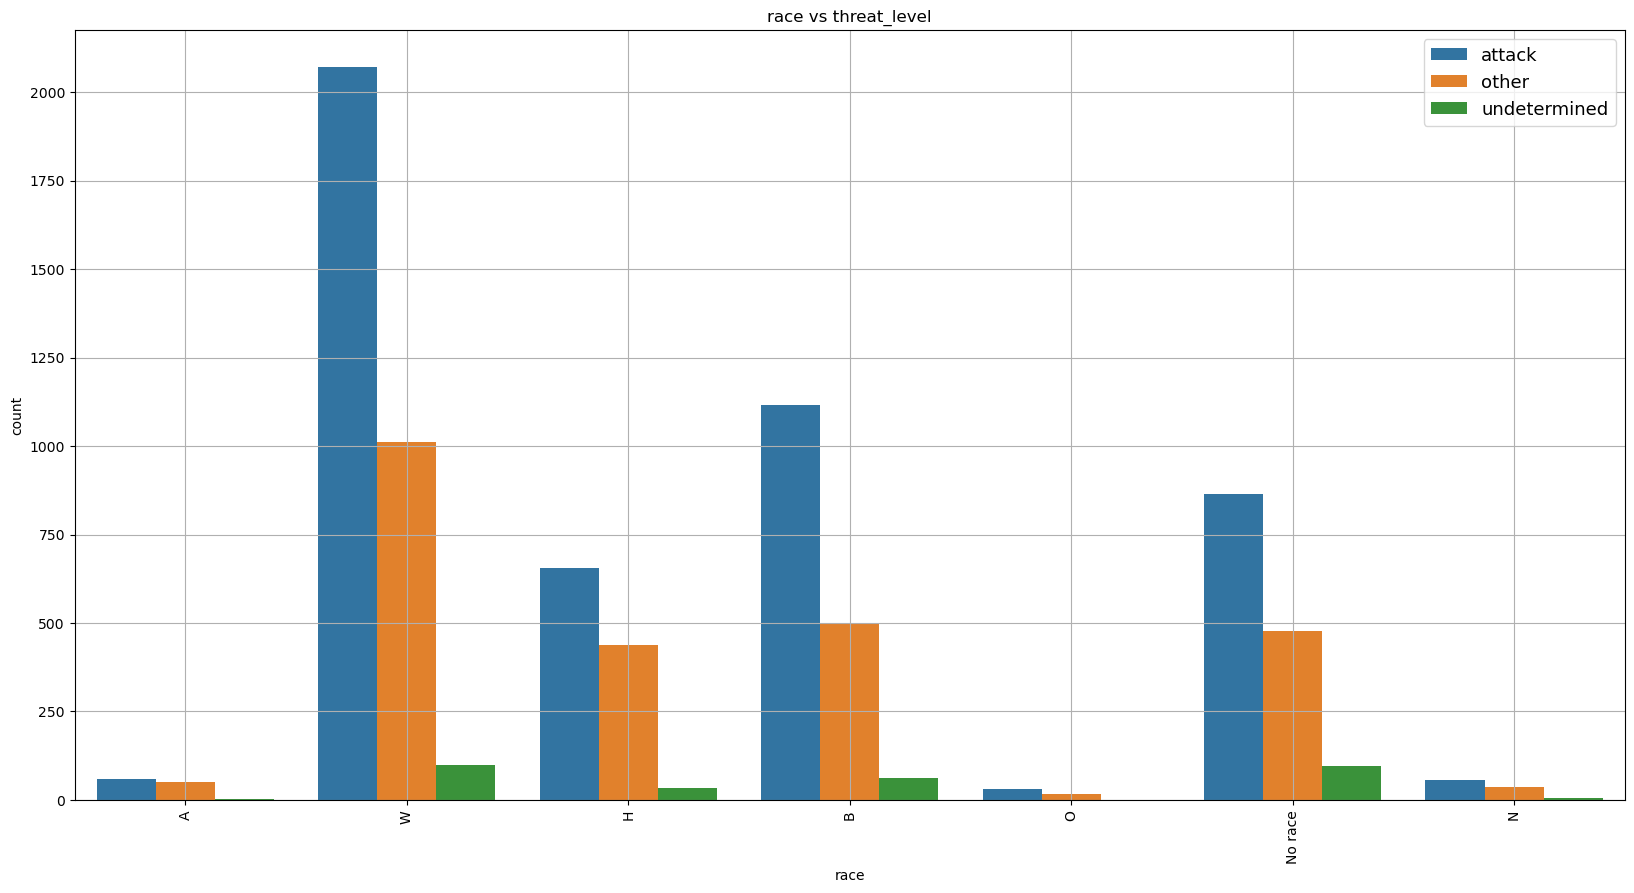

In [100]:
#comparing race and threat_level

plt.figure(figsize=(20,10))
sns.countplot(x='race', hue='threat_level', data=df)
plt.title('race vs threat_level')
plt.legend(fontsize=13)
plt.grid()
plt.xticks(rotation = 90)

# observation:
    different factors could have caused the rate of killings in the United State and one of the factor could be racism
    from the picture above it is well known that the race that had the highest threat level was 'W', 
    while race 'O' had the lowest threat level

In [101]:
#city grouped by the threat level
df.groupby(['city', 'threat_level']).agg(amount=('id', 'count'))

amount
city                         threat_level        
300 block of State Line Road other              1
Abbeville                    attack             2
                             other              1
Aberdeen                     attack             2
Abilene                      attack             2
...                                           ...
Yulee                        other              1
Yuma                         other              5
Zanesville                   attack             1
Zion                         attack             1
                             other              1

[3986 rows x 1 columns]

In [102]:
#flee grouped by gender
df.groupby(['gender', 'flee']).agg(amount=('id', 'count'))

amount
gender    flee               
F         Car              66
          Foot             19
          No flee          38
          Not fleeing     215
          Other             8
M         Car            1176
          Foot            957
          No flee         813
          Not fleeing    4093
          Other           278
No gender Car               2
          Foot              3
          No flee          12
          Not fleeing       2

(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'No gender')])

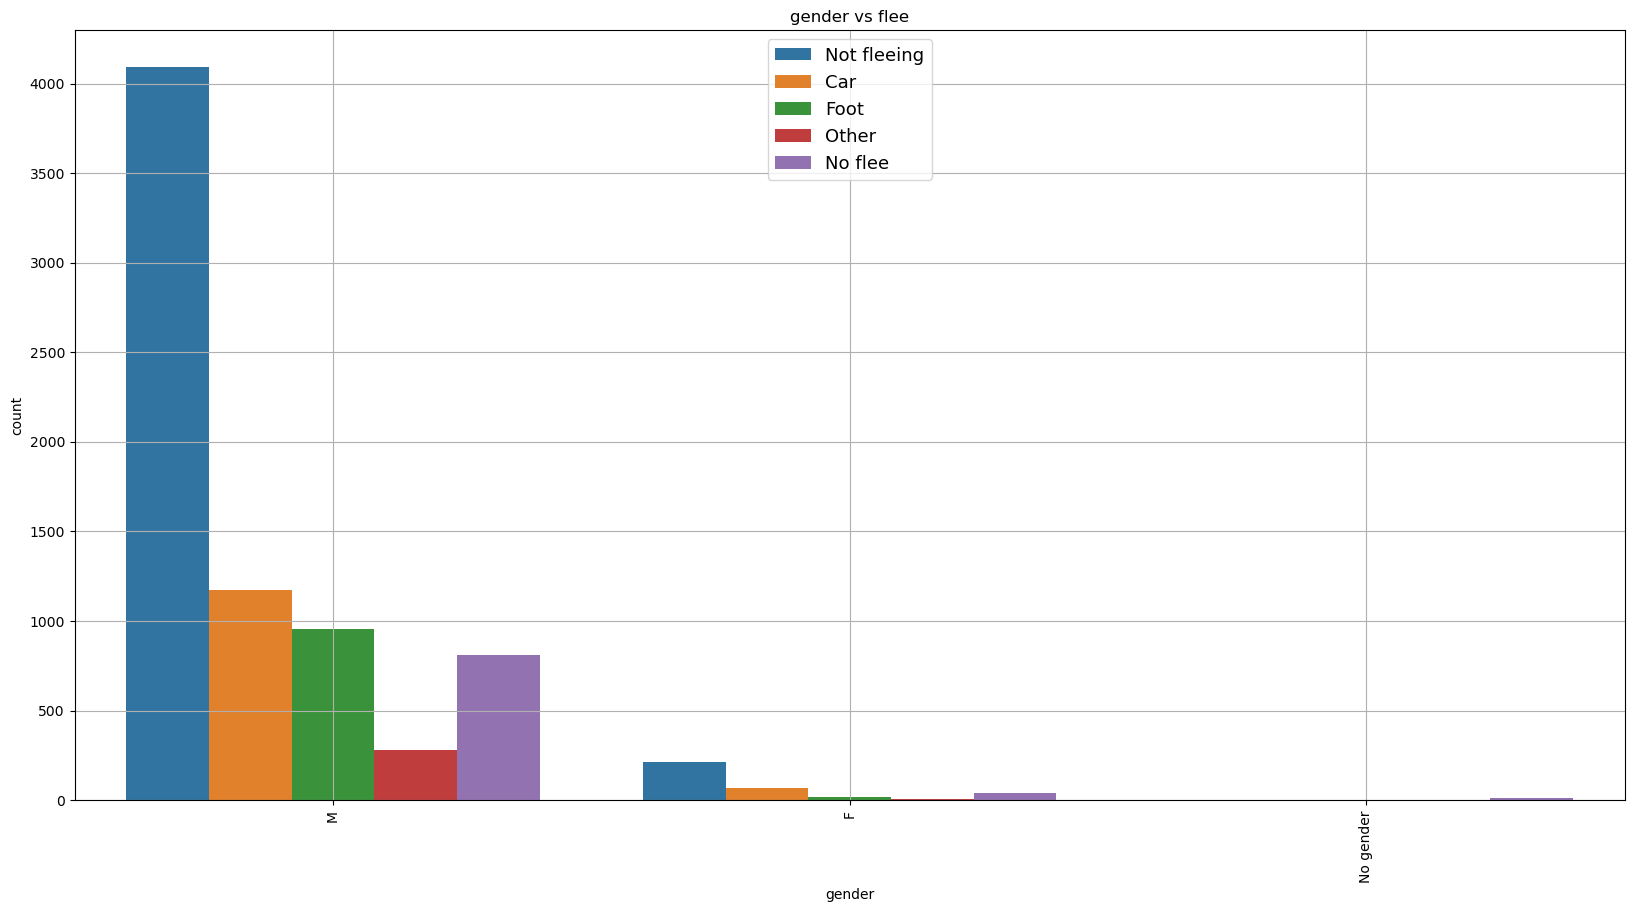

In [103]:
#comparing flee and gender

plt.figure(figsize=(20,10))
sns.countplot(x='gender', hue='flee', data=df)
plt.title('gender vs flee')
plt.legend(fontsize=13)
plt.grid()
plt.xticks(rotation = 90)

# observation:
    it is well obvious that the male gender flee due to the incident happening more than the female gender
    the mode of movement of some were not determined as well
    but among the male gender people that flee with car was much compared other which was not mentioned 
    and also among the female gender people that flee with car was more and people that their mode of movement 
    was not discovered were much as well

In [104]:
#flee grouped by race
df.groupby(['race', 'flee']).agg(amount=('id', 'count'))

amount
race    flee               
A       Car              12
        Foot             11
        No flee           7
        Not fleeing      81
        Other             1
B       Car             263
        Foot            327
        No flee         123
        Not fleeing     896
        Other            69
H       Car             184
        Foot            159
        No flee          84
        Not fleeing     642
        Other            58
N       Car              11
        Foot             18
        No flee          14
        Not fleeing      50
        Other             4
No race Car             240
        Foot            152
        No flee         372
        Not fleeing     628
        Other            46
O       Car              10
        Foot              5
        No flee           1
        Not fleeing      29
        Other             2
W       Car             524
        Foot            307
        No flee         262
        Not fleeing    1984
        Other           106

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'W'),
  Text(2, 0, 'H'),
  Text(3, 0, 'B'),
  Text(4, 0, 'O'),
  Text(5, 0, 'No race'),
  Text(6, 0, 'N')])

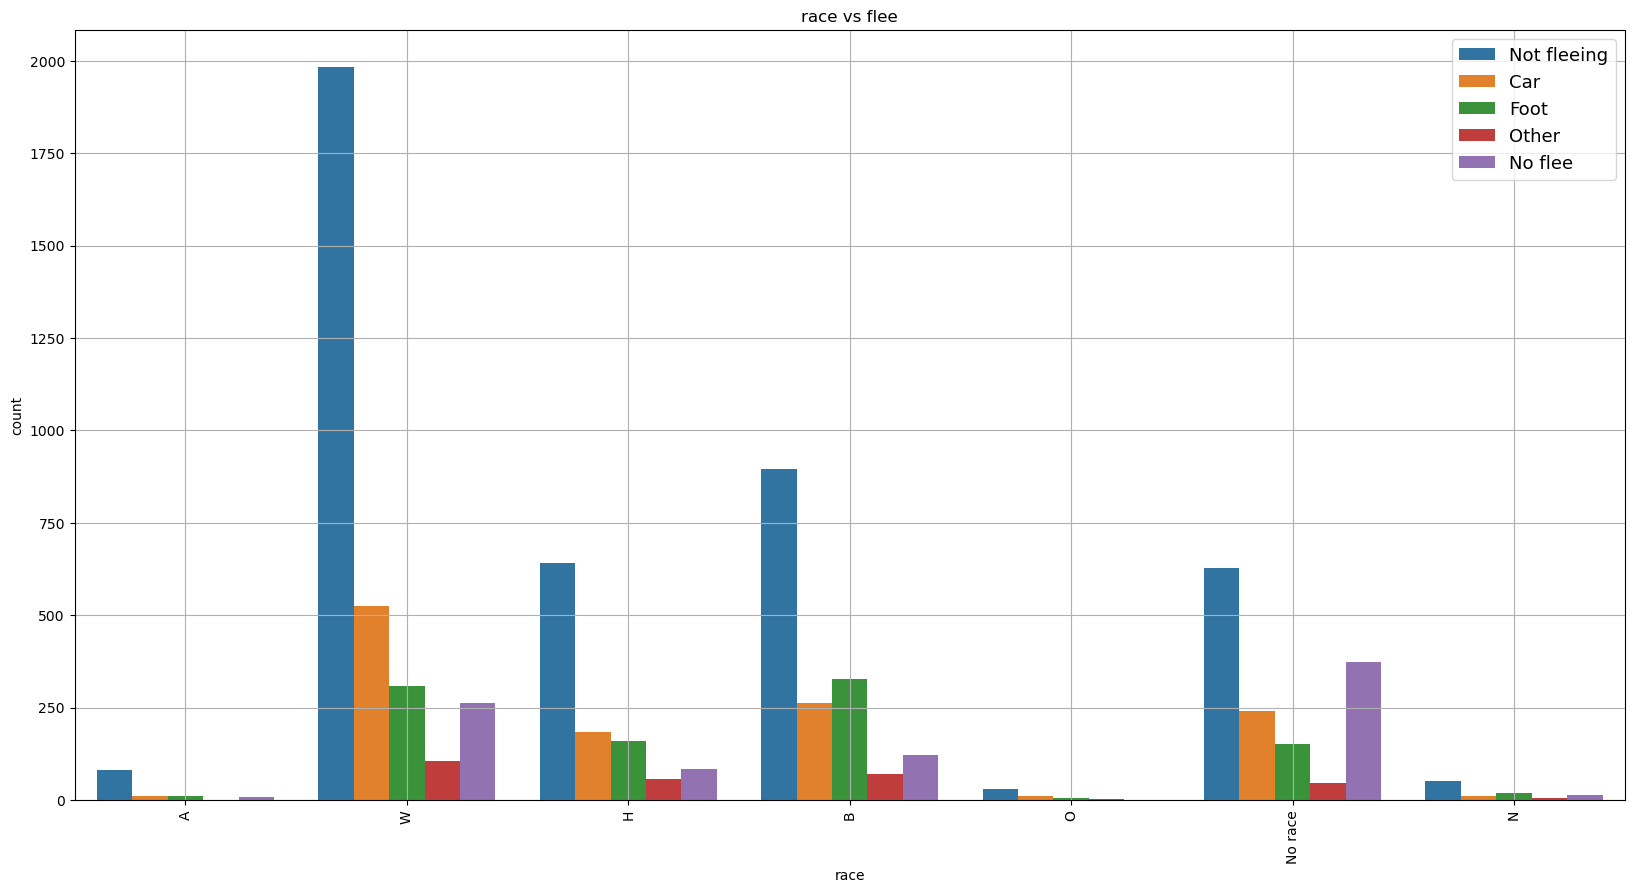

In [123]:
#comparing flee and gender

plt.figure(figsize=(20,10))
sns.countplot(x='race', hue='flee', data=df)
plt.title('race vs flee')
plt.legend(fontsize=13)
plt.grid()
plt.xticks(rotation = 90)

# observation:
the race known as 'W' happened to be the race which flee most due to the incident compared to other races while the 
race that has the lowest movement was race 'o'

In [106]:
#flee grouped by race
df.groupby(['race', 'age']).agg(amount=('id', 'count'))

amount
race age         
A    15.0       1
     16.0       3
     18.0       3
     19.0       2
     20.0       2
...           ...
W    81.0       2
     82.0       2
     83.0       2
     84.0       4
     91.0       2

[378 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '6.0'),
  Text(2, 0, '8.0'),
  Text(3, 0, '12.0'),
  Text(4, 0, '13.0'),
  Text(5, 0, '14.0'),
  Text(6, 0, '15.0'),
  Text(7, 0, '16.0'),
  Text(8, 0, '17.0'),
  Text(9, 0, '18.0'),
  Text(10, 0, '19.0'),
  Text(11, 0, '20.0'),
  Text(12, 0, '21.0'),
  Text(13, 0, '22.0'),
  Text(14, 0, '23.0'),
  Text(15, 0, '24.0'),
  Text(16, 0, '25.0'),
  Text(17, 0, '26.0'),
  Text(18, 0, '27.0'),
  Text(19, 0, '28.0'),
  Text(20, 0, '29.0'),
  Text(21, 0, '30.0'),
  Text(22, 0, '31.0'),
  Text(23, 0, '32.0'),
  Text(24, 0, '33.0'),
  Text(25, 0, '34.0'),
  Text(26, 0, '35.0'),
  Text(27, 0, '36.0'),
  T

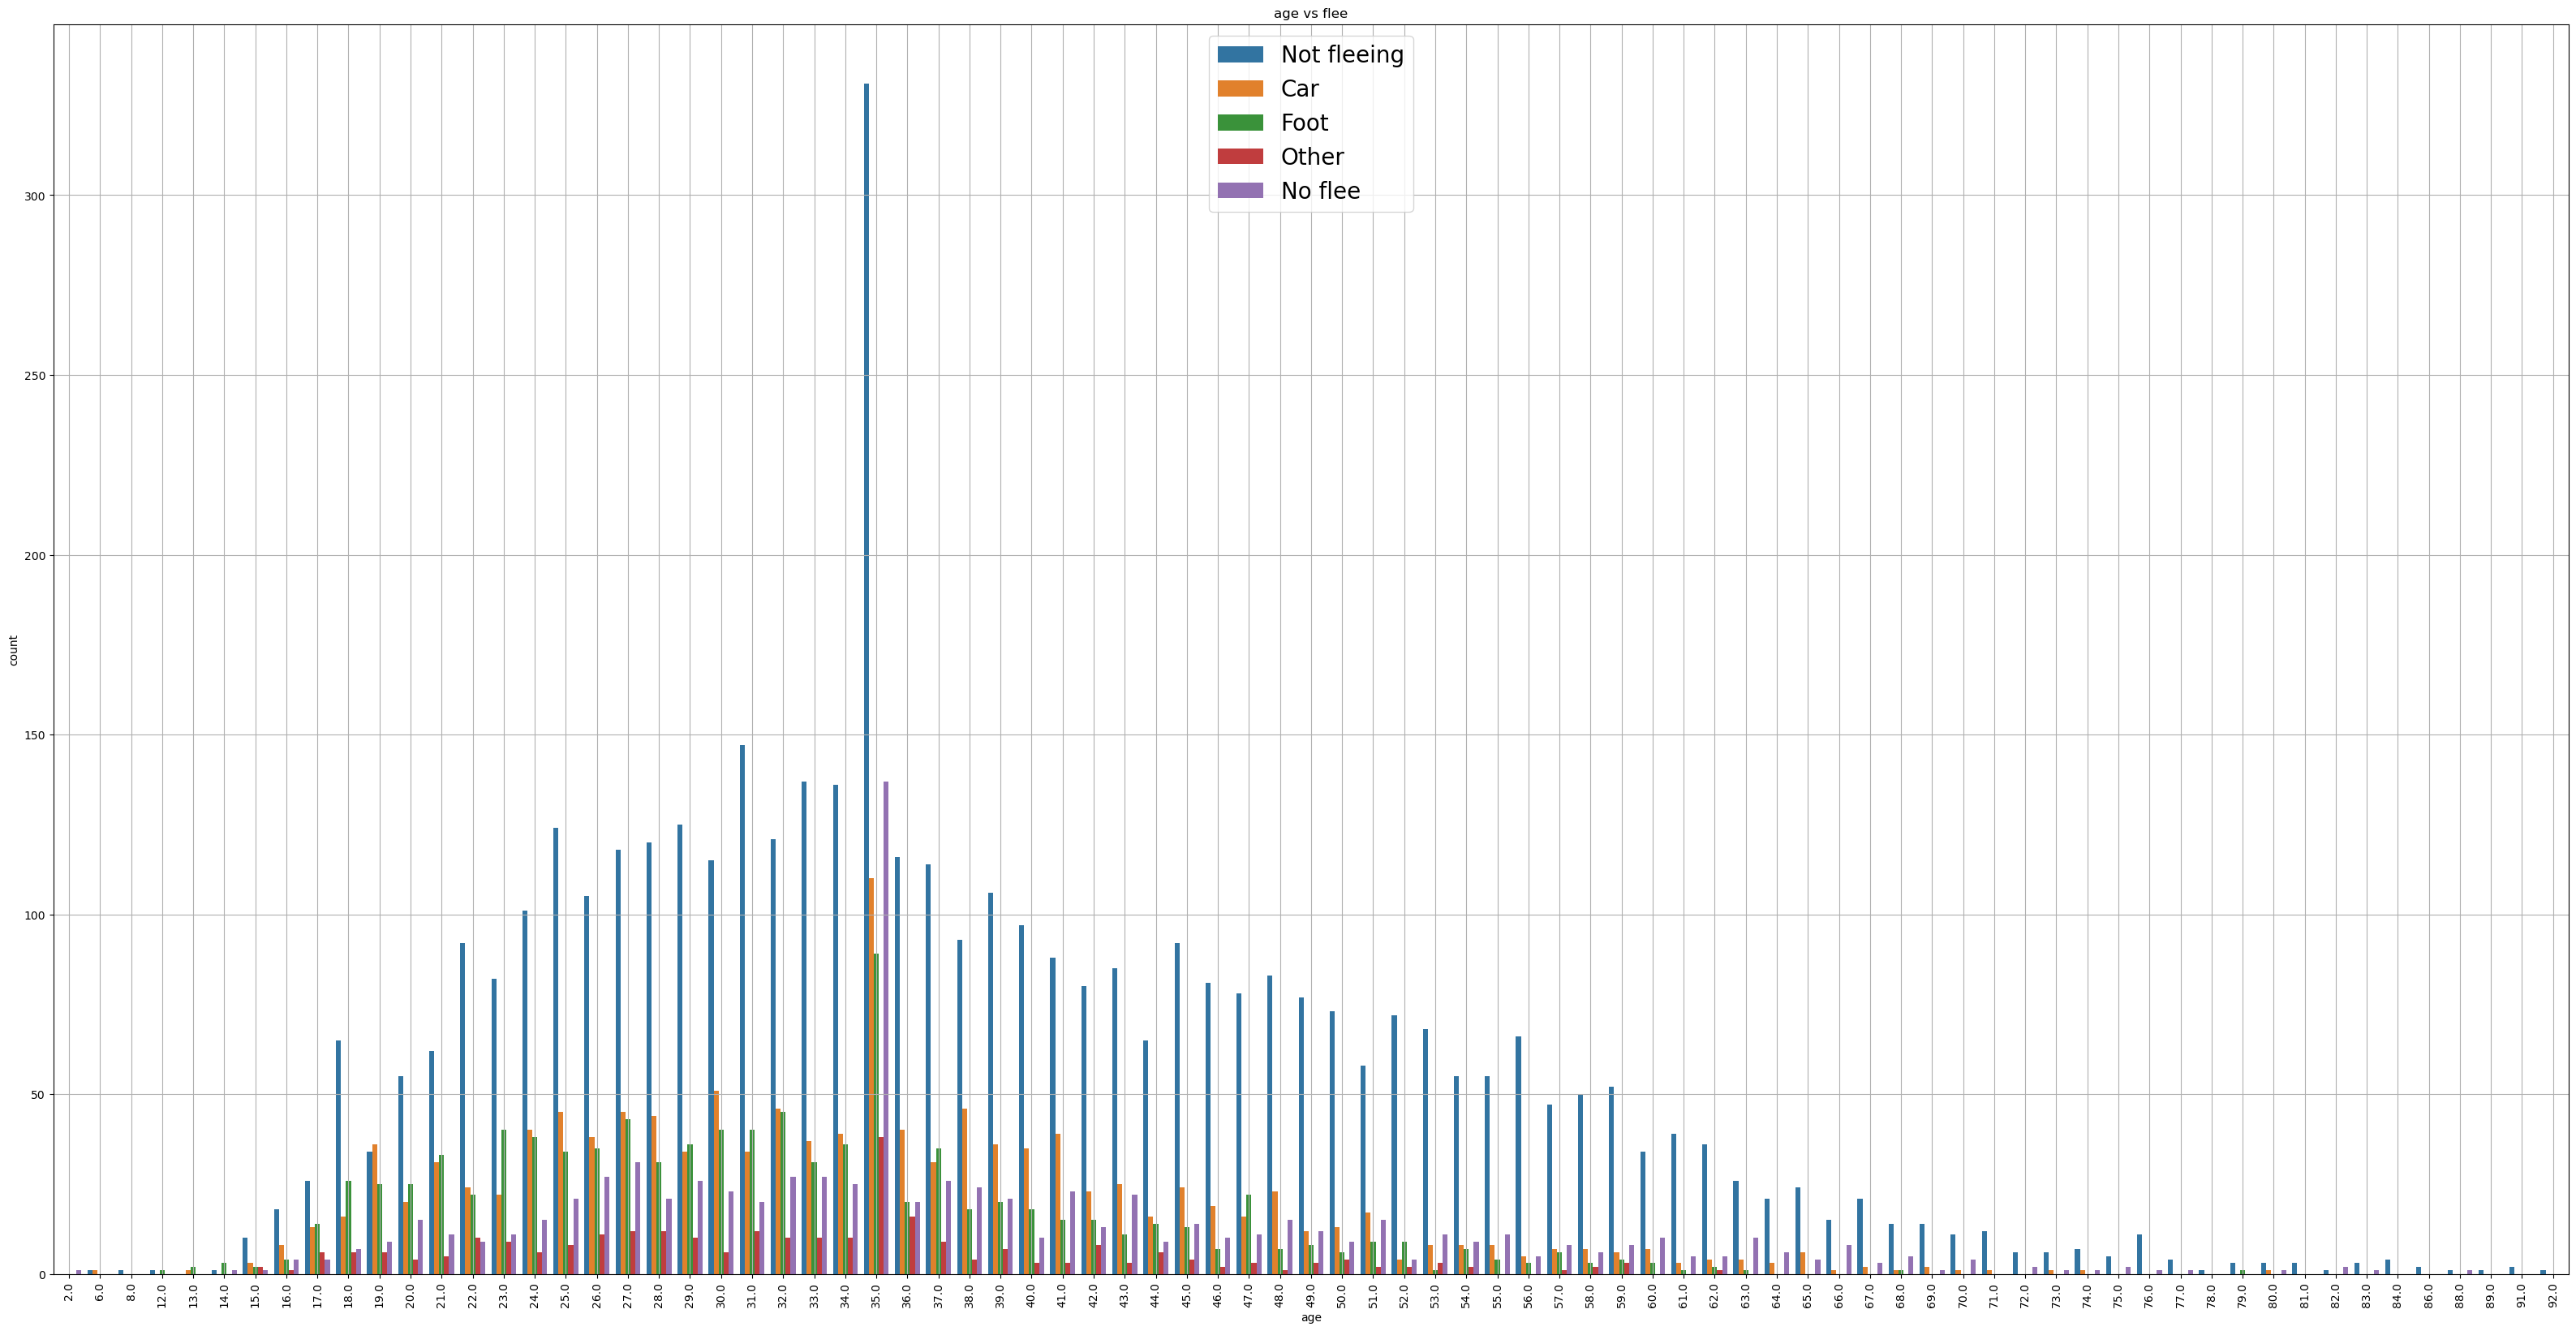

In [107]:
#comparing flee and gender

plt.figure(figsize=(40,20))
sns.countplot(x='age', hue='flee', data=df)
plt.title('age vs flee')
plt.legend(fontsize=20)
plt.grid()
plt.xticks(rotation = 90)

In [110]:
#flee grouped by race
df.groupby(['city', 'longitude']).agg(amount=('id', 'count'))

amount
city                         longitude        
300 block of State Line Road -94.2515        1
Abbeville                    -92.1240        1
                             -85.2810        1
                             -82.6320        1
Aberdeen                     -123.8240       1
...                                        ...
Yuma                         -114.6180       1
                             -114.4870       1
Zanesville                   -82.0440        1
Zion                         -87.8450        1
                             -87.8340        1

[7194 rows x 1 columns]

In [129]:
#flee grouped by race
df.groupby(['city', 'latitude']).agg(amount=('id', 'count'))

amount
city                         latitude        
300 block of State Line Road 36.099         1
Abbeville                    29.965         1
                             31.573         1
                             34.243         1
Aberdeen                     35.134         1
...                                       ...
Yuma                         32.721         1
                             32.743         1
Zanesville                   39.898         1
Zion                         42.452         1
                             42.456         1

[7121 rows x 1 columns]